# Webscrapping Project on Travel Triangle 

### Importing Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import  warnings
warnings.filterwarnings('ignore')

### Loading Csv file

In [116]:
df=pd.read_csv(r"C:\Users\mdimr\OneDrive\Documents\WebPages1_46TT.csv")

In [117]:
df

Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
889           889          64   
890           890          65   
891           891          66   
892           892          67   
893           893          68   

                                         Package_Names Prices_Before_Discount  \
0                Coorg Package For 2 Nights And 3 Days                 17,802   
1    Best 4N 5D Andaman Sightseeing Tour Package Fo...                 36,484   
2    Bestselling Rishikesh Mussoorie Tour Package F...                 12,545   
3      Mesmerising Manali Trip Package From Chandigarh                 10,440   
4    Top Family Holiday Packages in Goa for an Idea...                 15,217   
..                                                 ...                    ...   
889                 Mesmerising Rajasthan Tour Package                 18,010   
890  Enrapturing Munnar-Thekkady-Kumarakom Kerala F...                 16,909   
891               Jammu Kashmir Family Holiday Package                 34,711   
892        Rajasthan Tour Package For Adventure Lovers                 14,761   
893  Fantastic Uttarakhand Tour Packages For An Exo...                 17,708   

    Prices_After_Discount  Days  Nights        Cities Adventures  Nature  \
0                  16,200     3       2        Coorg   Adventure  Nature   
1                  33,200     5       4   Port Blair   Adventure  Nature   
2                  11,549     3       2    Rishikesh   Adventure  Nature   
3                   9,500     3       2       Manali   Adventure  Nature   
4                  14,000     5       4    Calangute   Adventure     NaN   
..                    ...   ...     ...           ...        ...     ...   
889                16,000     3       2       Jaipur         NaN     NaN   
890                14,880     6       5       Munnar   Adventure  Nature   
891                30,352     9       8        Katra         NaN  Nature   
892                13,000     5       4  Ranthambore         NaN     NaN   
893                16,800     5       4     Nainital         NaN  Nature   

      Hill_Station  Water_Activities  Religious Star_Hotels  Travellers  \
0    Hill Stations               NaN  Religious      3 Star      5736.0   
1    Hill Stations  Water Activities        NaN      3 Star     20148.0   
2    Hill Stations               NaN        NaN      4 Star      7589.0   
3    Hill Stations  Water Activities  Religious      3 Star     34932.0   
4              NaN  Water Activities        NaN      3 Star     13108.0   
..             ...               ...        ...         ...         ...   
889            NaN               NaN  Religious      5 Star     16836.0   
890  Hill Stations               NaN        NaN      5 Star         NaN   
891            NaN               NaN  Religious      4 Star         NaN   
892            NaN               NaN        NaN      5 Star         NaN   
893  Hill Stations               NaN  Religious      4 Star      8370.0   

     Ratings  Reviews                 State  
0        4.2    447.0             Karnataka  
1        4.1   2606.0  Andaman and Nicobar   
2        4.0    323.0           Uttarakhand  
3        4.1   2321.0      Himachal Pradesh  
4        4.5     47.0                   Goa  
..       ...      ...                   ...  
889      4.1    423.0             Rajasthan  
890      4.1   4223.0                Kerala  
891      4.1   2160.0     Jammu and Kashmir  
892      3.8     53.0             Rajasthan  
893      4.0    846.0           Uttarakhand  

[894 rows x 18 columns]

### Price Column Formatting:
* The 'Prices_Before_Discount' and 'Prices_After_Discount' columns are processed to remove commas and ensure numerical consistency. 
* This is achieved by applying a lambda function to each column using the apply method.


In [118]:
df['Prices_Before_Discount'][0].replace(",","")
#final_df['Prices'][0].replace("₹","").replace(",","")

'17802'

In [119]:
df['Prices_Before_Discount'] = df['Prices_Before_Discount'].apply(lambda x: x.replace(",", "") if isinstance(x, str) else x)

In [120]:
df['Prices_After_Discount'] = df['Prices_After_Discount'].apply(lambda x: x.replace(",", "") if isinstance(x, str) else x)

In [121]:
df['Prices_Before_Discount']

0      17802
1      36484
2      12545
3      10440
4      15217
       ...  
889    18010
890    16909
891    34711
892    14761
893    17708
Name: Prices_Before_Discount, Length: 894, dtype: object

## Drop Unnecessary Columns:
* The columns 'Unnamed: 0.1' and 'Unnamed: 0' are dropped from the DataFrame using the drop method with the specified axis values


In [122]:
# 1. Drop unnecessary columns
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

## Imputation of Missing Values

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Package_Names           894 non-null    object 
 1   Prices_Before_Discount  892 non-null    object 
 2   Prices_After_Discount   893 non-null    object 
 3   Days                    894 non-null    int64  
 4   Nights                  894 non-null    int64  
 5   Cities                  894 non-null    object 
 6   Adventures              667 non-null    object 
 7   Nature                  795 non-null    object 
 8   Hill_Station            441 non-null    object 
 9   Water_Activities        162 non-null    object 
 10  Religious               280 non-null    object 
 11  Star_Hotels             894 non-null    object 
 12  Travellers              886 non-null    float64
 13  Ratings                 882 non-null    float64
 14  Reviews                 882 non-null    fl

* Before proceeding with imputation, let's examine the distributions of the original numerical columns: "Prices_Before_Discount", "Prices_After_Discount", "Travellers", "Reviews", and "Ratings".

### Using Travel Triangle Logo Extracted colors using color picker(Coolur)

In [13]:
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Set the custom palette globally
sns.set_palette(fyn_palette)

**Note** : After Imputating missing value the resultant column distribution should be same or close to original age distribution

### Imputation Techniques for Price_Before_Discount column

**Note** : After Imputating missing values the resultant column distribution should be same or close to original column distribution

#### Distribution of Price_Before_Discount without imputing Missing values

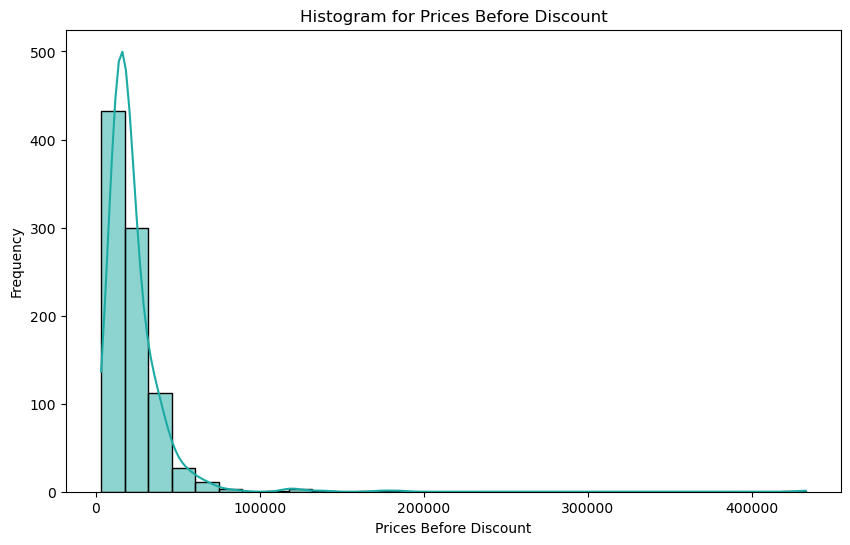

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a subplot
plt.figure(figsize=(10, 6))

# Plot histogram for Prices_Before_Discount
sns.histplot(df['Prices_Before_Discount'].dropna(), bins=30, kde=True, color=fyn_palette[0])

plt.title('Histogram for Prices Before Discount')
plt.xlabel('Prices Before Discount')
plt.ylabel('Frequency')
plt.show()


### Distribution for Imputing missing values with Median

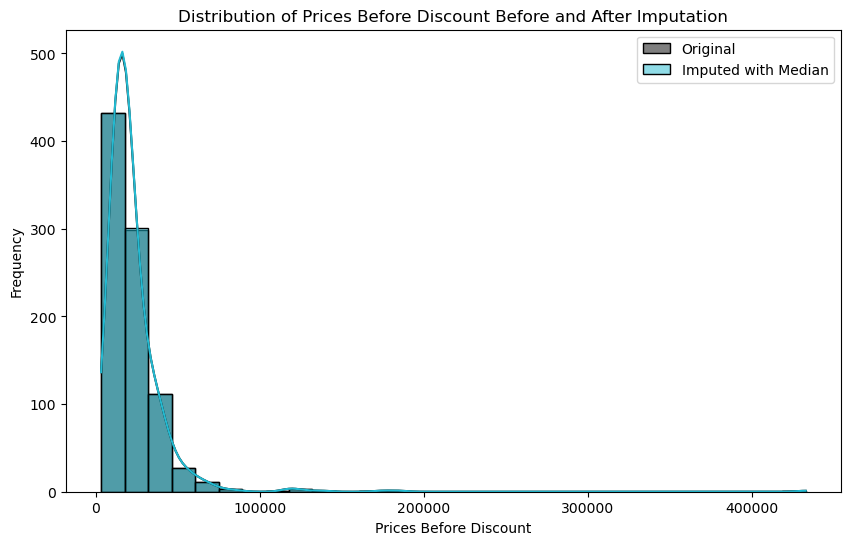

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Copy the 'Prices_Before_Discount' column for imputation
df_prices = df['Prices_Before_Discount'].copy()

# Convert the 'Prices_Before_Discount' column to numeric
df_prices = pd.to_numeric(df_prices, errors='coerce')

# Impute missing values with median
df_prices_median = df_prices.fillna(df_prices.median())

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Plot distribution plot with both original and imputed data using custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df_prices, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_prices_median, bins=30, kde=True, color=fyn_palette[1], label='Imputed with Median')
plt.title('Distribution of Prices Before Discount Before and After Imputation')
plt.xlabel('Prices Before Discount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*  Since Distributions are same before and after imputation so, For missing values in  price_Before_Dsiconut are imputed with Median

### Imputation Technique for Price_After_Discount column
#### Distribution of Price_After_Discount without imputing Missing values

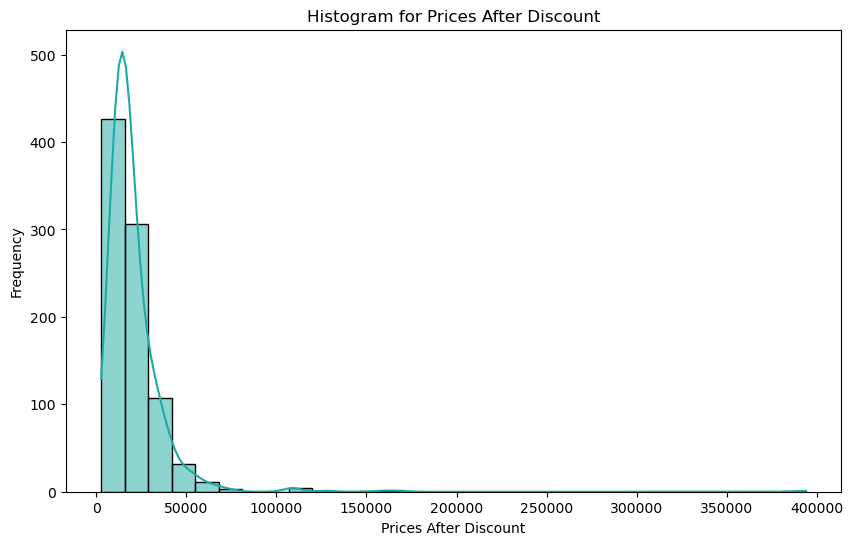

In [21]:
# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a subplot
plt.figure(figsize=(10, 6))

# Plot histogram for Prices_Before_Discount
sns.histplot(df['Prices_After_Discount'].dropna(), bins=30, kde=True, color=fyn_palette[0])

plt.title('Histogram for Prices After Discount')
plt.xlabel('Prices After Discount')
plt.ylabel('Frequency')
plt.show()


### Distribution for Imputing missing values with Median

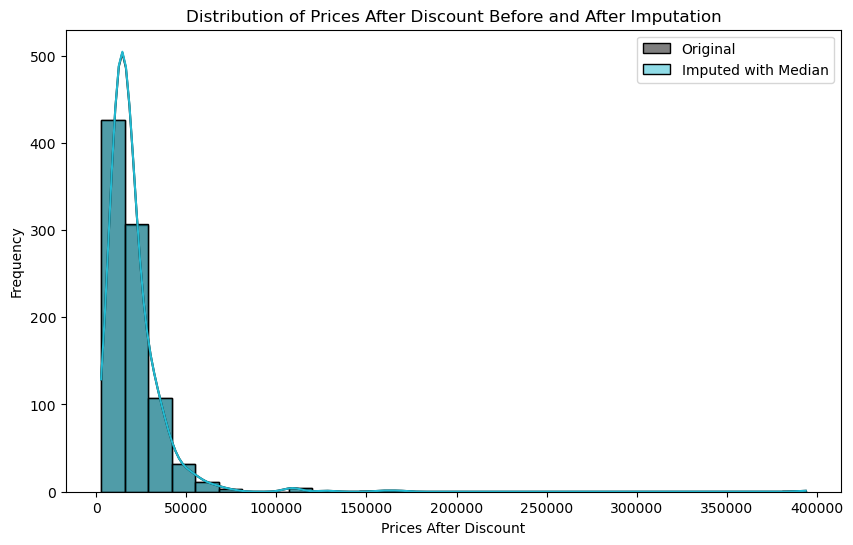

In [16]:

# Assuming df is your DataFrame
# Copy the 'Prices_After_Discount' column for imputation
df_prices_after_discount = df['Prices_After_Discount'].copy()

# Convert the 'Prices_After_Discount' column to numeric
df_prices_after_discount = pd.to_numeric(df_prices_after_discount, errors='coerce')

# Impute missing values with median
df_prices_after_discount_median = df_prices_after_discount.fillna(df_prices_after_discount.median())

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Plot distribution plot with both original and imputed data using custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df_prices_after_discount, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_prices_after_discount_median, bins=30, kde=True, color=fyn_palette[1], label='Imputed with Median')
plt.title('Distribution of Prices After Discount Before and After Imputation')
plt.xlabel('Prices After Discount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*  Since Distributions are same before and after imputation so, For missing values in  price_Before_Dsiconut are imputed with Median

### Imputation Technique for Ratings column
#### Distribution of Ratings without imputing Missing values

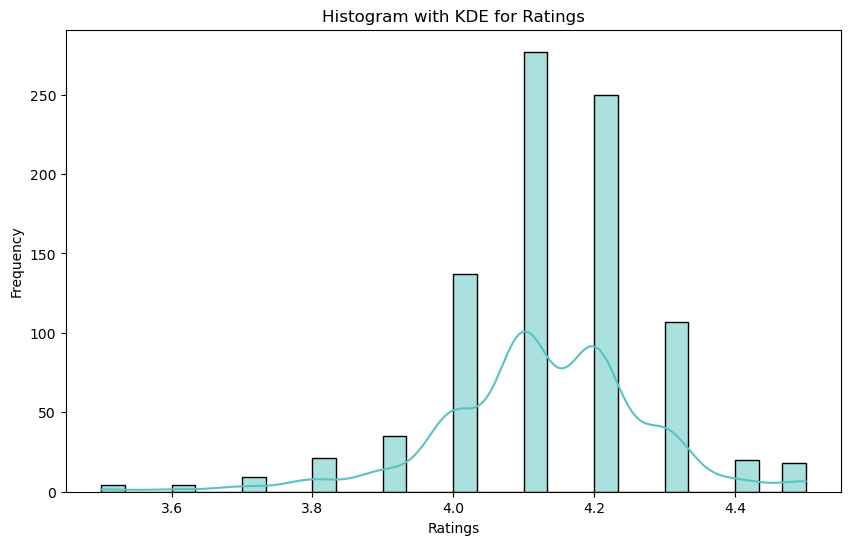

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a subplot
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for Ratings
sns.histplot(df['Ratings'].dropna(), bins=30, kde=True, color=fyn_palette[2])

plt.title('Histogram with KDE for Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


### Imputing Missing values  with Median

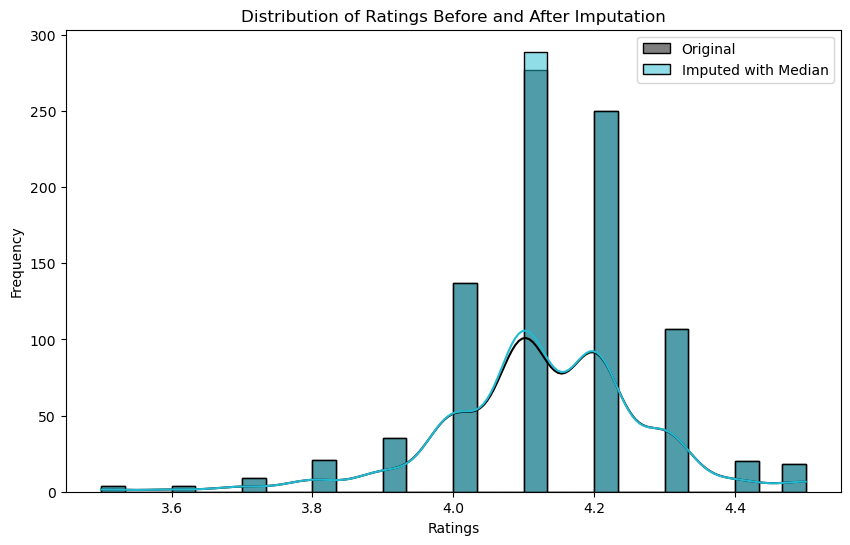

In [40]:
# Assuming df is your DataFrame
# Copy the 'Ratings' column for imputation
df_ratings = df['Ratings'].copy()

# Impute missing values with median
df_ratings_median = df_ratings.fillna(df_ratings.median())

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Plot distribution plot with both original and imputed data using custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df_ratings, bins=30, kde=True, color='black', label='Original')
sns.histplot(df_ratings_median, bins=30, kde=True, color=fyn_palette[1], label='Imputed with Median')
plt.title('Distribution of Ratings Before and After Imputation')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Imputing Missing values  with bfill

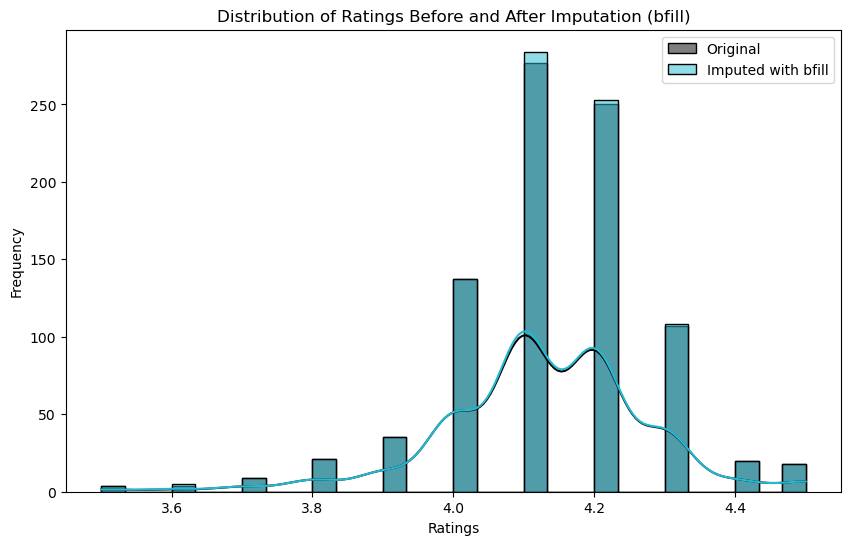

In [41]:
# Assuming df is your DataFrame
# Copy the 'Ratings' column for imputation with bfill
df_ratings_bfill = df['Ratings'].copy()

# Impute missing values with bfill
df_ratings_bfill.fillna(method='bfill', inplace=True)

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Plot distribution plot with both original and imputed data using custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df_ratings_bfill, bins=30, kde=True, color=fyn_palette[1], label='Imputed with bfill')
plt.title('Distribution of Ratings Before and After Imputation (bfill)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing values  with ffill

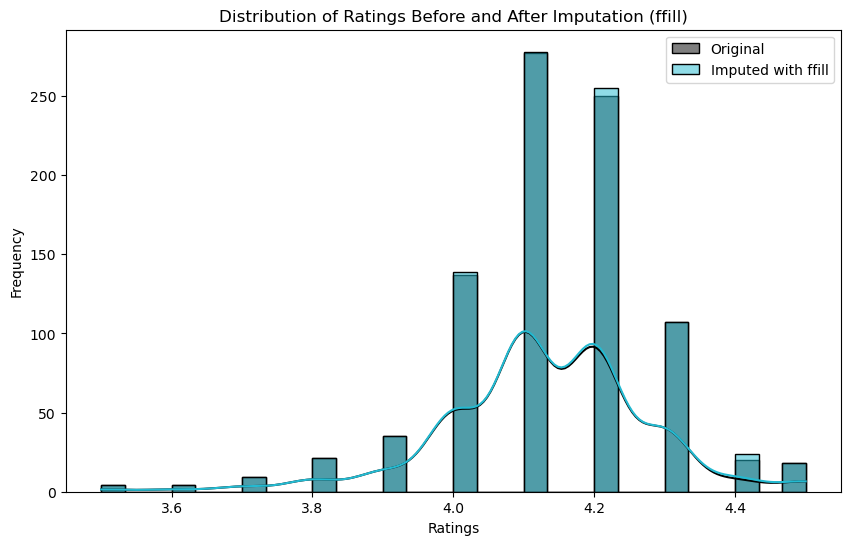

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Copy the 'Ratings' column for imputation with ffill
df_ratings_ffill = df['Ratings'].copy()

# Impute missing values with ffill
df_ratings_ffill.fillna(method='ffill', inplace=True)

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Plot distribution plot with both original and imputed data using custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df_ratings_ffill, bins=30, kde=True, color=fyn_palette[1], label='Imputed with ffill')
plt.title('Distribution of Ratings Before and After Imputation (ffill)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing values  with Interpolation

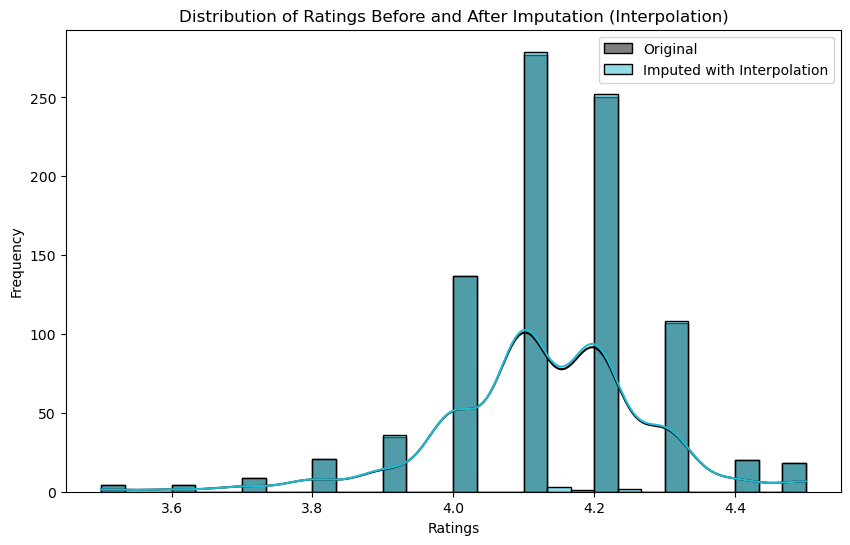

In [43]:
# Assuming df is your DataFrame
# Copy the 'Ratings' column for imputation with interpolation
df_ratings_interpolated = df['Ratings'].copy()

# Impute missing values with interpolation
df_ratings_interpolated.interpolate(method='linear', inplace=True)

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Plot distribution plot with both original and imputed data using custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df_ratings_interpolated, bins=30, kde=True, color=fyn_palette[1], label='Imputed with Interpolation')
plt.title('Distribution of Ratings Before and After Imputation (Interpolation)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* **After Imputing all techniques ffill distribution is closer to the distribution of Ratings**

## Imputation Technique for Reviews column
#### Distribution of Reviews without imputing Missing values

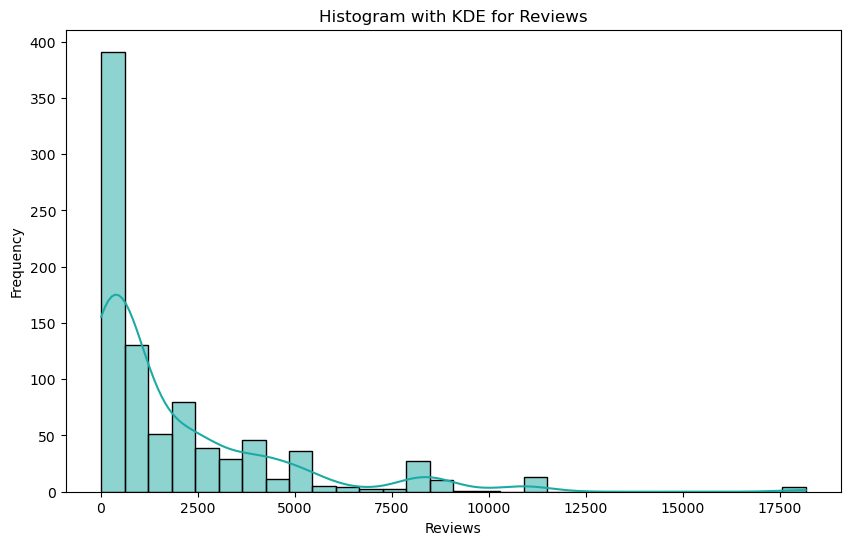

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a subplot
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for Reviews
sns.histplot(df['Reviews'].dropna(), bins=30, kde=True, color=fyn_palette[0])

plt.title('Histogram with KDE for Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()


### Imputing Missing Values with Median

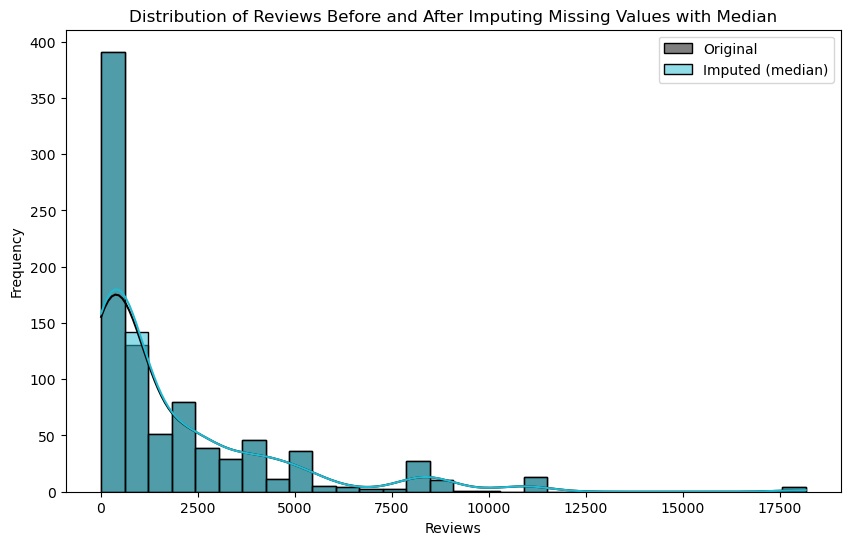

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df2 = df['Reviews'].copy()

# Impute missing values with median
df2.fillna(df2.median(), inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviews'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[1], label='Imputed (median)')
plt.title('Distribution of Reviews Before and After Imputing Missing Values with Median')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing Values with '0'

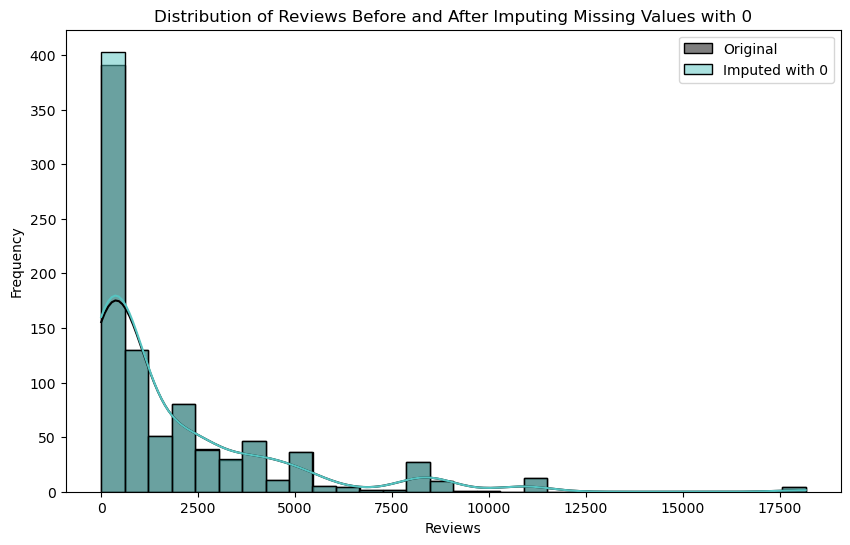

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df2 = df['Reviews'].copy()

# Impute missing values with 0
df2.fillna(0, inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviews'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[2], label='Imputed with 0')
plt.title('Distribution of Reviews Before and After Imputing Missing Values with 0')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing Values with bfill

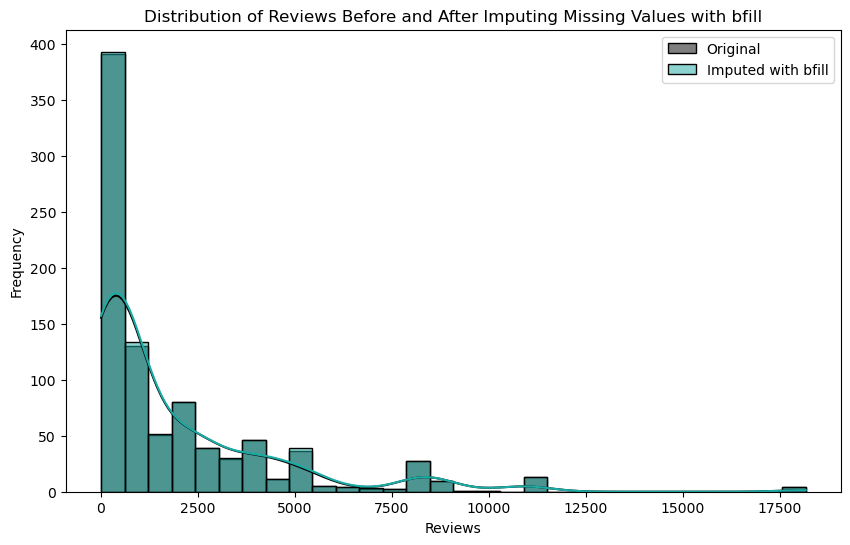

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df2 = df['Reviews'].copy()

# Impute missing values with backward fill (bfill)
df2.fillna(method='bfill', inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviews'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[0], label='Imputed with bfill')
plt.title('Distribution of Reviews Before and After Imputing Missing Values with bfill')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing Values with ffill

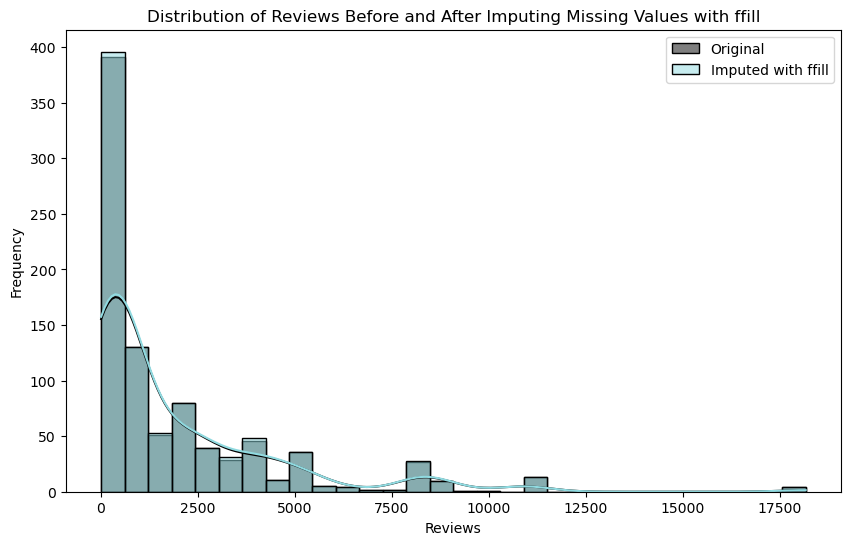

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df2 = df['Reviews'].copy()

# Impute missing values with forward fill (ffill)
df2.fillna(method='ffill', inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviews'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[4], label='Imputed with ffill')
plt.title('Distribution of Reviews Before and After Imputing Missing Values with ffill')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing Values with Interpolation

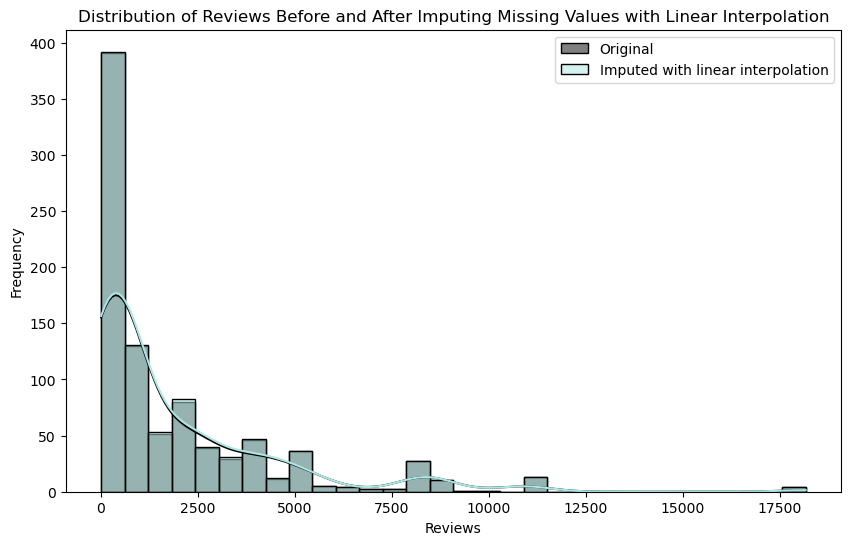

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df2 = df['Reviews'].copy()

# Impute missing values with linear interpolation
df2.interpolate(method='linear', inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviews'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[5], label='Imputed with linear interpolation')
plt.title('Distribution of Reviews Before and After Imputing Missing Values with Linear Interpolation')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* **After Imputing all techniques ffill distribution is closer to the distribution of Reviews**

## Imputation Technique for Travellers column
#### Distribution of Travellers without imputing Missing values

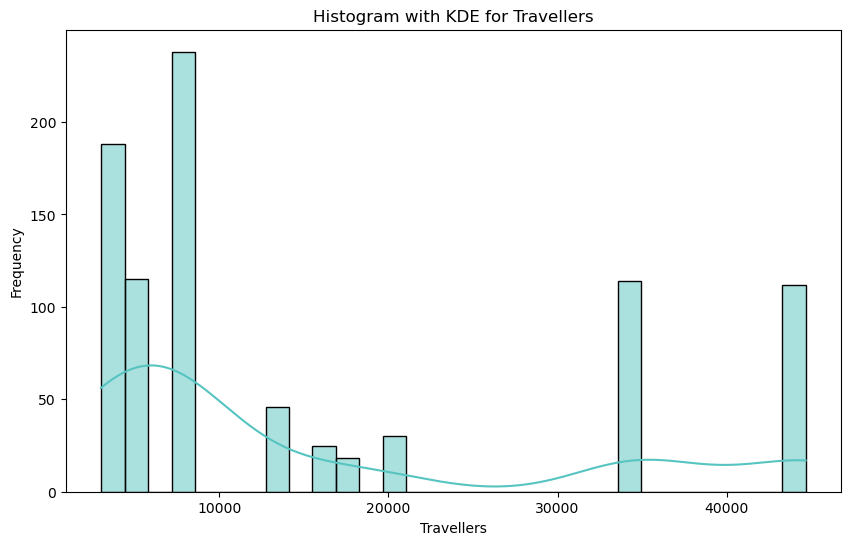

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a subplot
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for Travellers
sns.histplot(df['Travellers'].dropna(), bins=30, kde=True, color=fyn_palette[2])

plt.title('Histogram with KDE for Travellers')
plt.xlabel('Travellers')
plt.ylabel('Frequency')
plt.show()


### Imputing Missing values  with Median

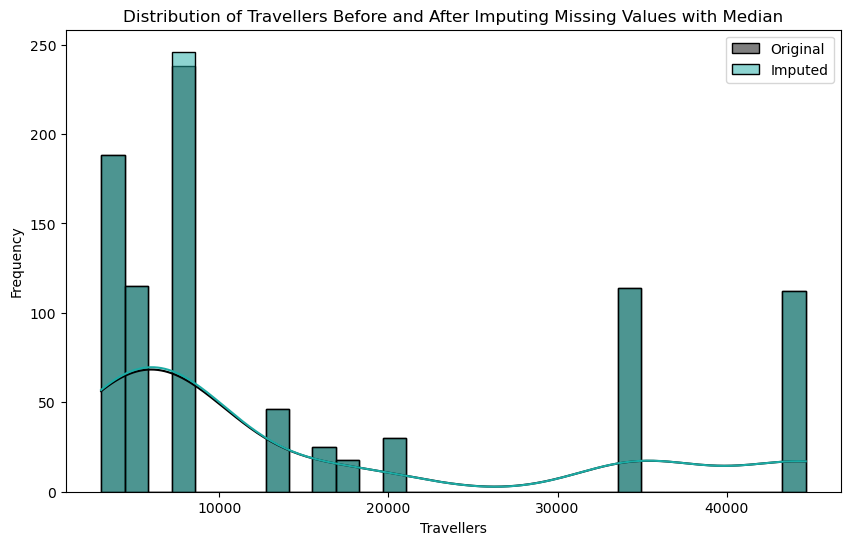

In [54]:
# Assuming df is your DataFrame
# Create a copy of 'Travellers' column to avoid the warning
df2 = df['Travellers'].copy()

# Impute missing values with median
df2.fillna(df2.median(), inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Travellers'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[0], label='Imputed')
plt.title('Distribution of Travellers Before and After Imputing Missing Values with Median')
plt.xlabel('Travellers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing values  with '0'

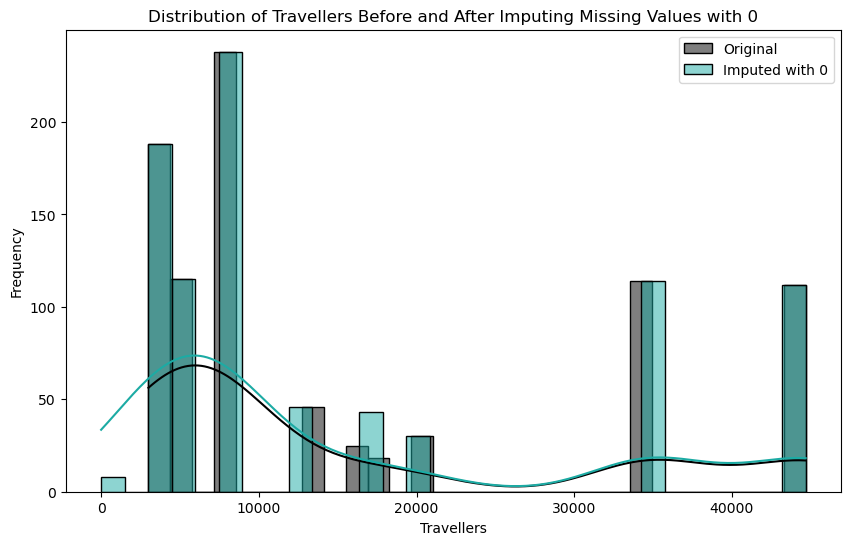

In [56]:
# Assuming df is your DataFrame
# Create a copy of 'Travellers' column to avoid the warning
df2 = df['Travellers'].copy()

# Impute missing values with 0
df2.fillna(0, inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Travellers'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[0], label='Imputed with 0')
plt.title('Distribution of Travellers Before and After Imputing Missing Values with 0')
plt.xlabel('Travellers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing values  with bfill

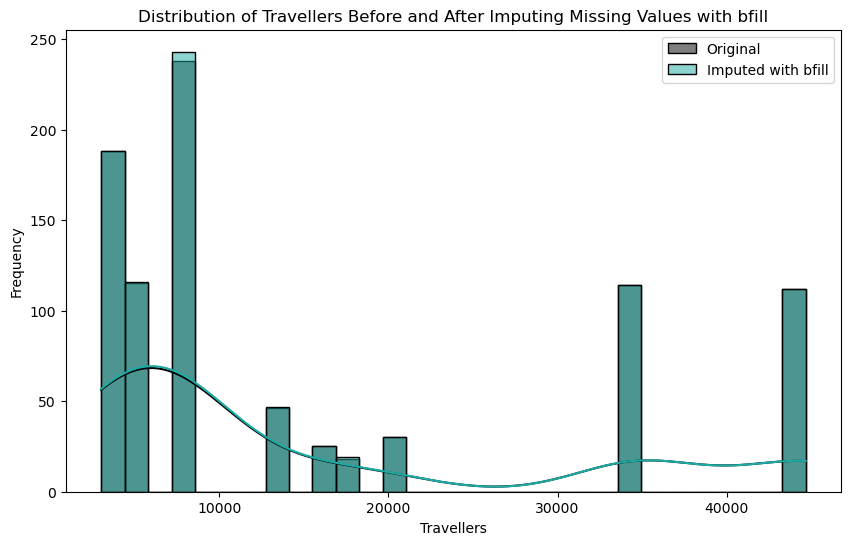

In [57]:
# Assuming df is your DataFrame
# Create a copy of 'Travellers' column to avoid the warning
df2 = df['Travellers'].copy()

# Impute missing values with backward fill (bfill)
df2.fillna(method='bfill', inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Travellers'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[0], label='Imputed with bfill')
plt.title('Distribution of Travellers Before and After Imputing Missing Values with bfill')
plt.xlabel('Travellers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing values  with ffill

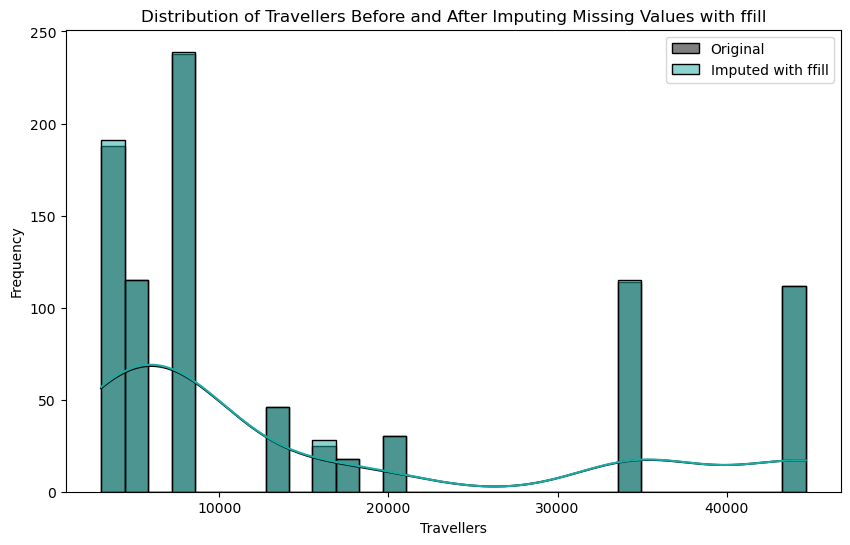

In [58]:
# Assuming df is your DataFrame
# Create a copy of 'Travellers' column to avoid the warning
df2 = df['Travellers'].copy()

# Impute missing values with forward fill (ffill)
df2.fillna(method='ffill', inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Travellers'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[0], label='Imputed with ffill')
plt.title('Distribution of Travellers Before and After Imputing Missing Values with ffill')
plt.xlabel('Travellers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Imputing Missing values  with Interpolation

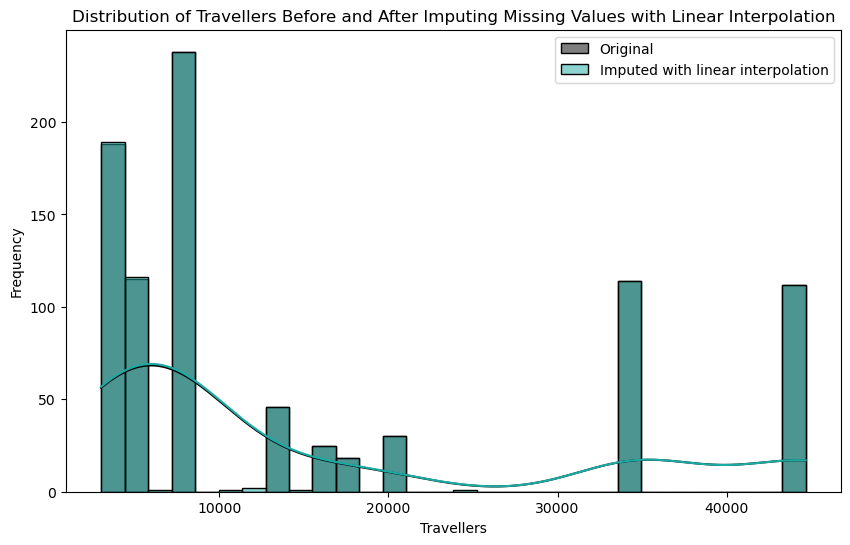

In [59]:
# Assuming df is your DataFrame
# Create a copy of 'Travellers' column to avoid the warning
df2 = df['Travellers'].copy()

# Impute missing values with linear interpolation
df2.interpolate(method='linear', inplace=True)

# Plot distribution plot after imputing using df1 with custom palette
plt.figure(figsize=(10, 6))
sns.histplot(df['Travellers'], bins=30, kde=True, color='black', label='Original')
sns.histplot(df2, kde=True, bins=30, color=fyn_palette[0], label='Imputed with linear interpolation')
plt.title('Distribution of Travellers Before and After Imputing Missing Values with Linear Interpolation')
plt.xlabel('Travellers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* **After Imputing all techniques ffill distribution is closer to the distribution of Travellers**

## Imputation for Numerical columns 

In [124]:
# Convert 'Prices_Before_Discount' and 'Prices_After_Discount' to numeric
df['Prices_Before_Discount'] = pd.to_numeric(df['Prices_Before_Discount'], errors='coerce')
df['Prices_After_Discount'] = pd.to_numeric(df['Prices_After_Discount'], errors='coerce')

# Fill missing values in Prices_Before_Discount and Prices_After_Discount with median
df['Prices_Before_Discount'].fillna(df['Prices_Before_Discount'].median(), inplace=True)
df['Prices_After_Discount'].fillna(df['Prices_After_Discount'].median(), inplace=True)

# Fill missing values in Travellers, Reviews, and Ratings with ffill
df['Travellers'].fillna(method='ffill', inplace=True)
df['Reviews'].fillna(method='ffill', inplace=True)
df['Ratings'].fillna(method='ffill', inplace=True)


## Imputation for Categorical column 

#### Categorical Data Imputation with "Not Available"
**Imputation Approach**
* For categorical columns with missing values, rather than imputing with the mode (most frequent value), the decision has been made to impute missing values with the label "Not Available".


In [125]:
replacement_value = 'Not Available'

columns_to_fill = ['Adventures', 'Nature', 'Water_Activities', 'Religious', 'Hill_Station']

df[columns_to_fill] = df[columns_to_fill].fillna(replacement_value)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            894 non-null    int64  
 1   Unnamed: 0              894 non-null    int64  
 2   Package_Names           894 non-null    object 
 3   Prices_Before_Discount  894 non-null    float64
 4   Prices_After_Discount   894 non-null    float64
 5   Days                    894 non-null    int64  
 6   Nights                  894 non-null    int64  
 7   Cities                  894 non-null    object 
 8   Adventures              894 non-null    object 
 9   Nature                  894 non-null    object 
 10  Hill_Station            894 non-null    object 
 11  Water_Activities        894 non-null    object 
 12  Religious               894 non-null    object 
 13  Star_Hotels             894 non-null    object 
 14  Travellers              894 non-null    fl

## Type Casting

In [126]:
# Convert 'Prices_Before_Discount' and 'Prices_After_Discount' to int
df['Prices_Before_Discount'] = df['Prices_Before_Discount'].astype(float).astype('Int32')
df['Prices_After_Discount'] = df['Prices_After_Discount'].astype(float).astype('Int32')


df['Days']=df['Days'].astype('Int32')
df['Nights']=df['Nights'].astype('Int32')
# Convert 'Adventures', 'Nature', 'Water_Activities', 'Religious', 'StarHotel_2', 'StarHotel_3', 'StarHotel_4', 'StarHotel_5' to str
categorical_columns = ['Adventures', 'Nature', 'Water_Activities', 'Religious', 'Hill_Station','Star_Hotels']
df[categorical_columns] = df[categorical_columns].astype(str)

# Ensure 'Ratings' and 'Reviews' are in the desired float format
df['Ratings'] = df['Ratings'].astype(float)
df['Reviews'] = df['Reviews'].astype(int)
df['Travellers']=df['Travellers'].astype(int)

# Check the updated data types
print(df.dtypes)

Package_Names              object
Prices_Before_Discount      Int32
Prices_After_Discount       Int32
Days                        Int32
Nights                      Int32
Cities                     object
Adventures                 object
Nature                     object
Hill_Station               object
Water_Activities           object
Religious                  object
Star_Hotels                object
Travellers                  int32
Ratings                   float64
Reviews                     int32
State                      object
dtype: object


### Univariante - Non Visualization

In [61]:
import pandas as pd
import numpy as np



# Function to perform univariate analysis for each column
def univariate_analysis(column):
    if pd.api.types.is_numeric_dtype(df[column]):
        # For numeric columns
        summary = df[column].describe()
        outliers = df[(df[column] < summary['25%'] - 1.5 * (summary['75%'] - summary['25%'])) |
                      (df[column] > summary['75%'] + 1.5 * (summary['75%'] - summary['25%']))]

        analysis_result = f"""
        {column} Analysis:
        . Mean: {summary['mean']:.2f}
        . Median: {df[column].median():.2f}
        . Standard Deviation: {summary['std']:.2f}
        . Minimum: {summary['min']:.2f}
        . 25th Percentile (Q1): {summary['25%']:.2f}
        . 75th Percentile (Q3): {summary['75%']:.2f}
        . Maximum: {summary['max']:.2f}
        . Outliers: {len(outliers)}

        """
    else:
        # For object (categorical) columns
        value_counts = df[column].value_counts()
        missing_values = df[column].isnull().sum()
        unique_values = df[column].nunique()

        analysis_result = f"""
        {column} Analysis:
        . Unique Values: {unique_values}
        . Missing Values: {missing_values}
        . Top Value: {value_counts.idxmax()} ({value_counts.max()} occurrences)

        """

    return analysis_result

# Perform univariate analysis for each column
univariate_results = [univariate_analysis(col) for col in df.columns]

# Combine and stylize the results
formatted_results = f"\n{'='*20} Univariate Analysis {'='*20}\n\n{''.join(univariate_results)}"
print(formatted_results)



==================== Univariate Analysis ====================


        Package_Names Analysis:
        . Unique Values: 888
        . Missing Values: 0
        . Top Value: Hyderabad Tour Package From Kerala (2 occurrences)

        
        Prices_Before_Discount Analysis:
        . Mean: 22836.09
        . Median: 18098.00
        . Standard Deviation: 21334.41
        . Minimum: 3360.00
        . 25th Percentile (Q1): 13206.50
        . 75th Percentile (Q3): 26285.25
        . Maximum: 432692.00
        . Outliers: 54

        
        Prices_After_Discount Analysis:
        . Mean: 20714.37
        . Median: 16469.00
        . Standard Deviation: 19381.90
        . Minimum: 2800.00
        . 25th Percentile (Q1): 12037.00
        . 75th Percentile (Q3): 23789.00
        . Maximum: 393750.00
        . Outliers: 55

        
        Days Analysis:
        . Mean: 4.74
        . Median: 4.00
        . Standard Deviation: 2.03
        . Minimum: 2.00
        . 25th Percentile (Q1): 3

### Analysis on Packages

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1','#84C7C2', '#90DAE0',
                '#ADE7E3','#9CBFC7', '#879297', '#4A4F55','#1A2332', '#2C323C','#B8CDD2']

# Create a ListedColormap using the custom palette
cmap = ListedColormap(fyn_palette)

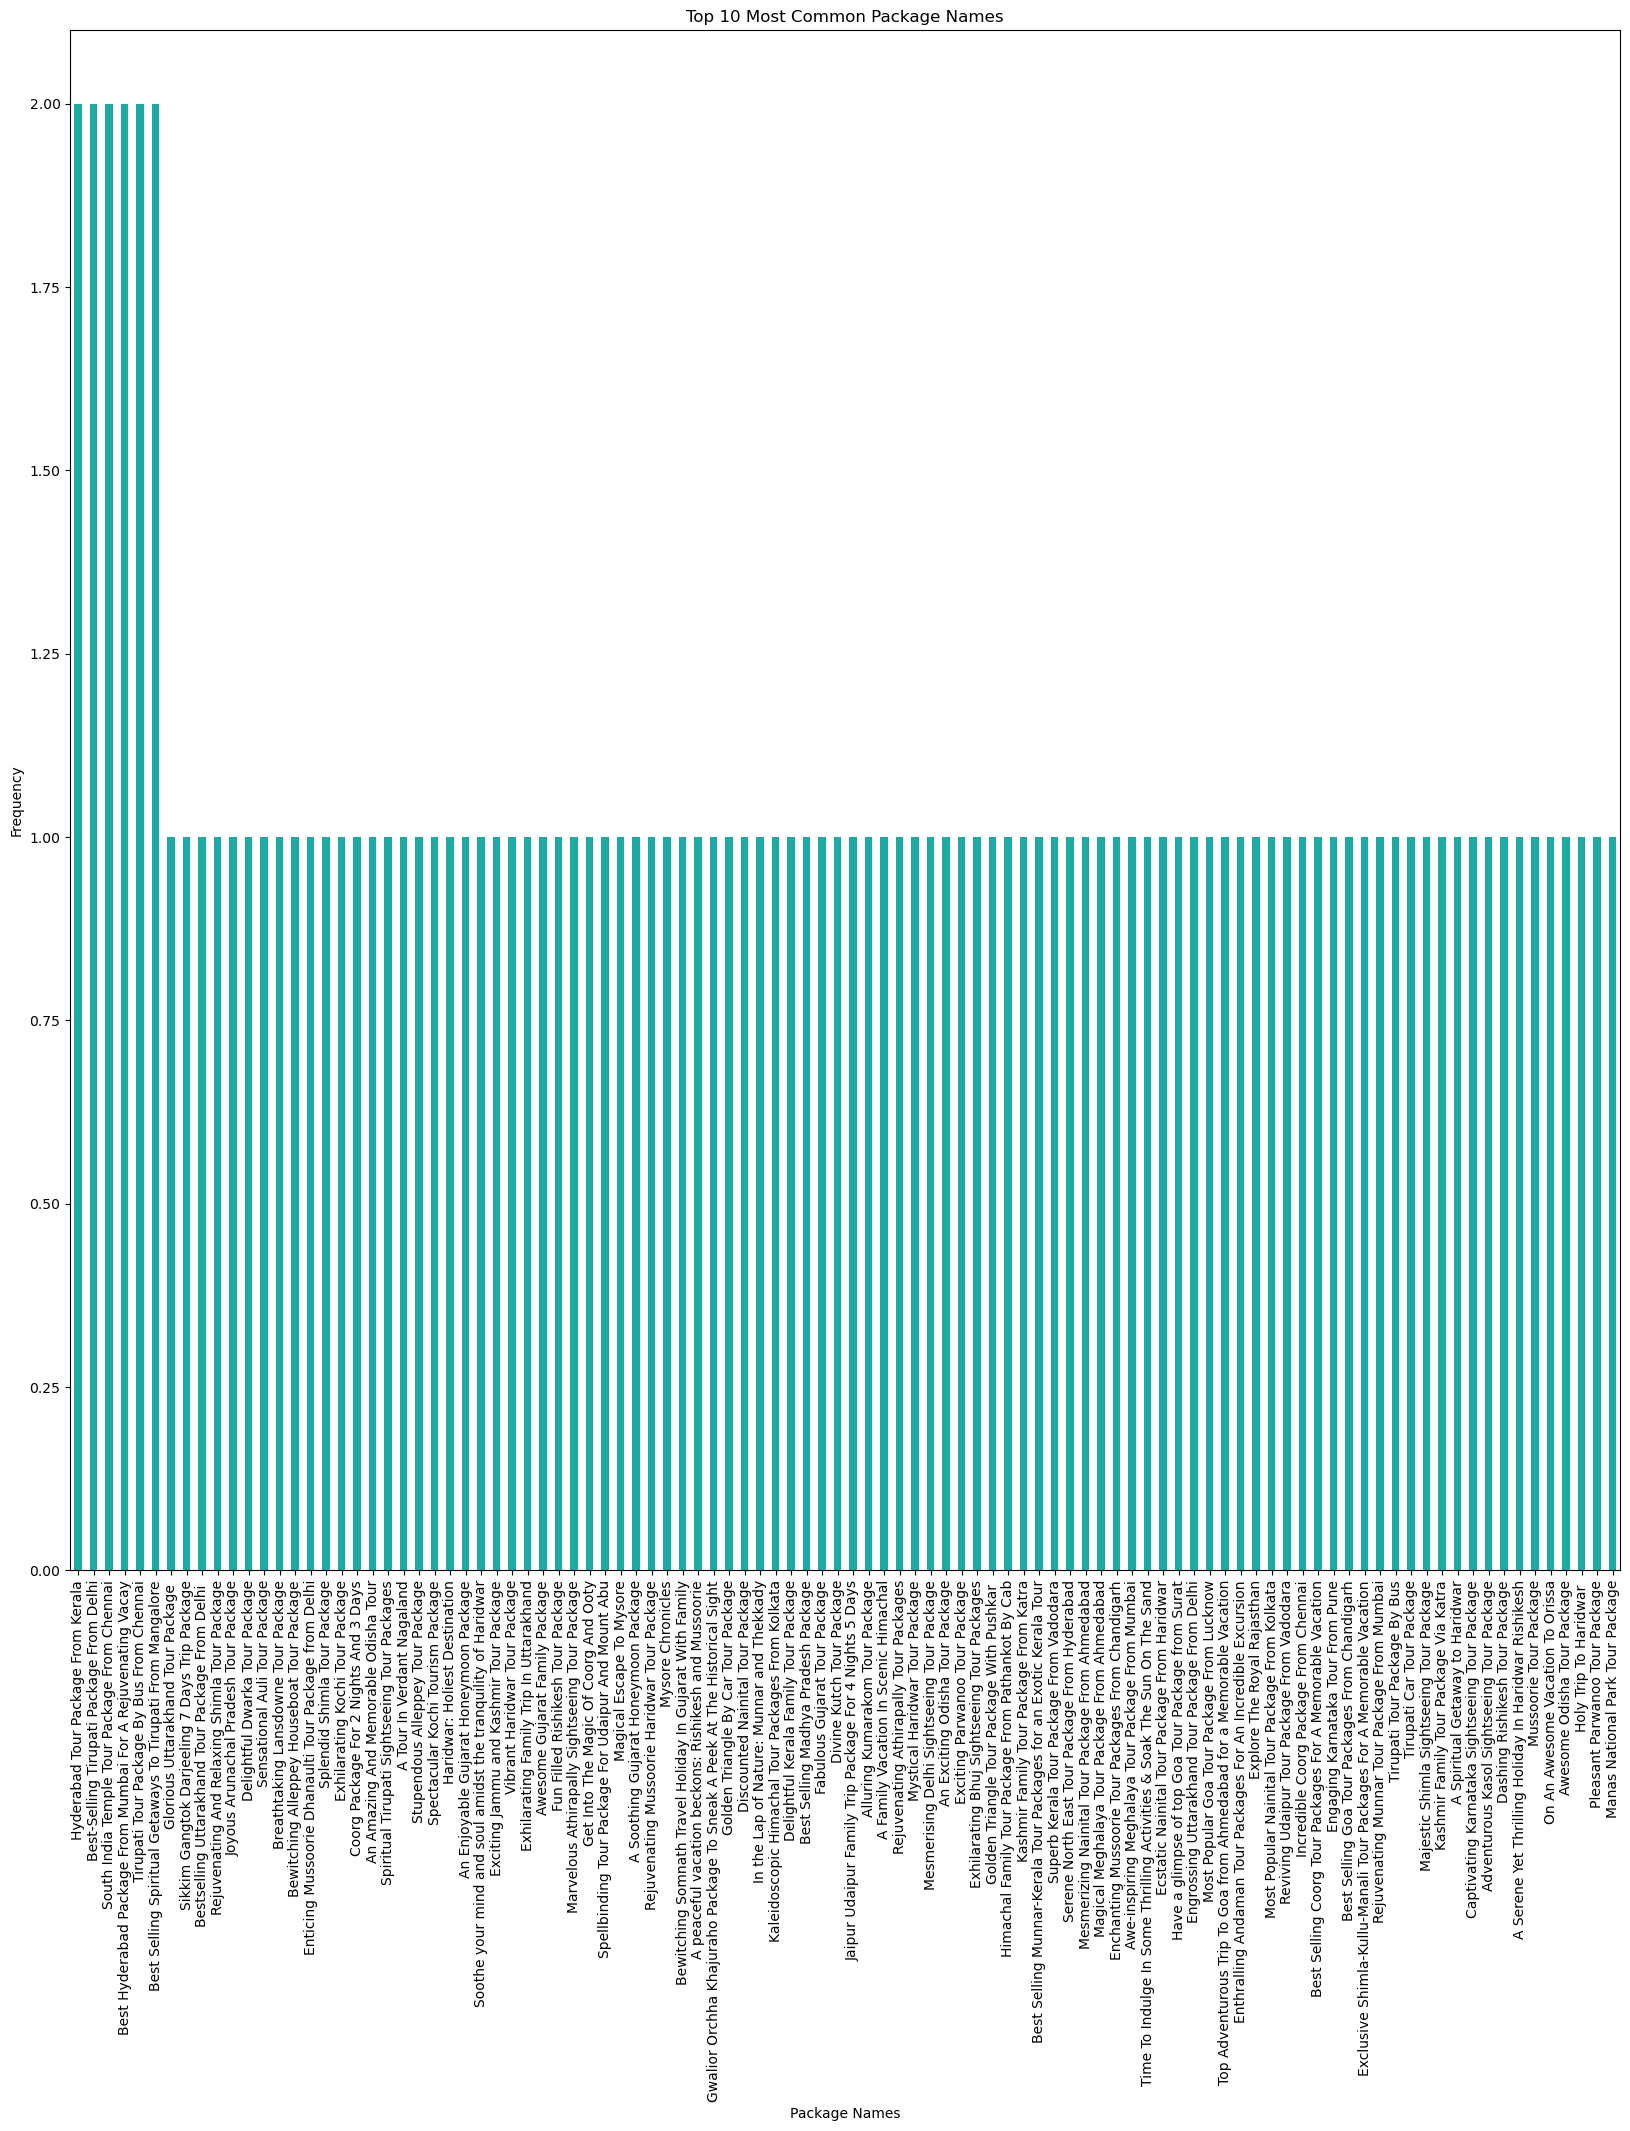

In [213]:
plt.figure(figsize=(20, 20))
df['Package_Names'].value_counts().head(100).plot(kind='bar', color='#1CABA4')
plt.title('Top 10 Most Common Package Names')
plt.xlabel('Package Names')
plt.ylabel('Frequency')
plt.show()

* Insights:
  * Among the packages listed, we observe that 5 packages are repeated, indicating a popular choice among customers.
  * The prevalence of these frequently repeated packages suggests that customers are more inclined towards these particular offerings. This observation aligns with the notion that Travel Triangle predominantly promotes packages that garner higher demand.


### Distribution of Prices_Before_Discount and Price_After_Discount

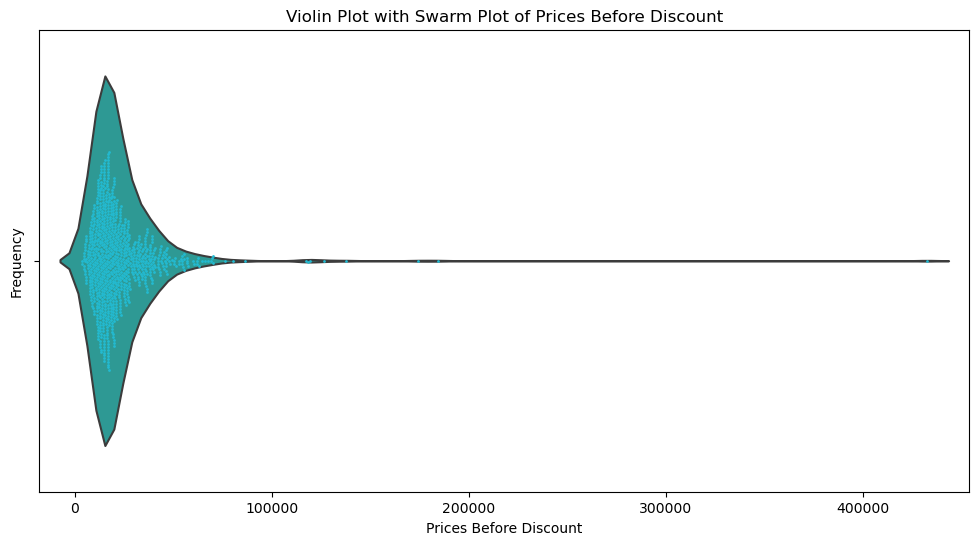

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a combined violin and swarm plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Prices_Before_Discount'], color=fyn_palette[0], inner=None)
sns.swarmplot(x=df['Prices_Before_Discount'], color=fyn_palette[1], size=2)
plt.title('Violin Plot with Swarm Plot of Prices Before Discount')
plt.xlabel('Prices Before Discount')
plt.ylabel('Frequency')
plt.show()


In [235]:
df['Prices_Before_Discount']

0      17802
1      36484
2      12545
3      10440
4      15217
       ...  
889    18010
890    16909
891    34711
892    14761
893    17708
Name: Prices_Before_Discount, Length: 894, dtype: Int32

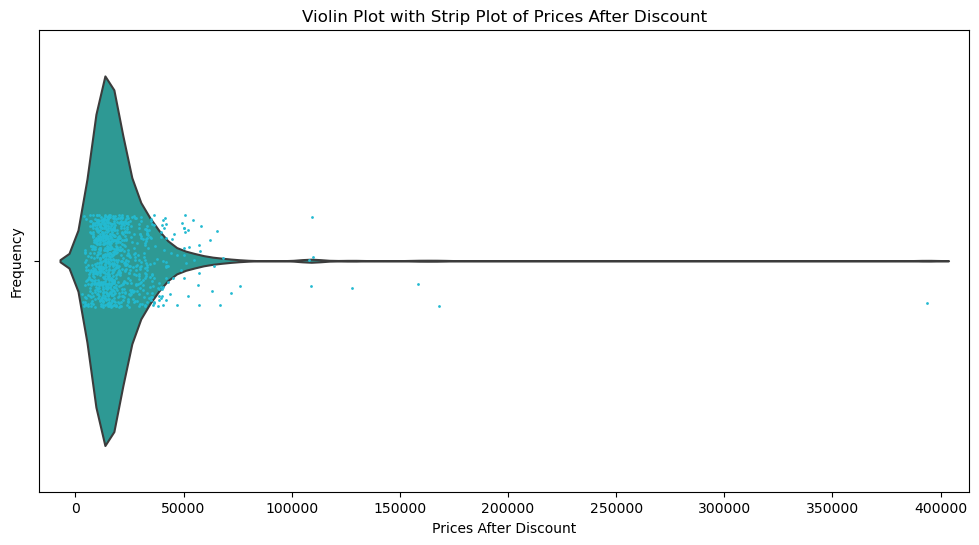

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a violin plot with strip plot inside
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Prices_After_Discount'], color=fyn_palette[0], inner=None)
sns.stripplot(x=df['Prices_After_Discount'], color=fyn_palette[1], size=2, jitter=True)
plt.title('Violin Plot with Strip Plot of Prices After Discount')
plt.xlabel('Prices After Discount')
plt.ylabel('Frequency')
plt.show()

### Packages for Days

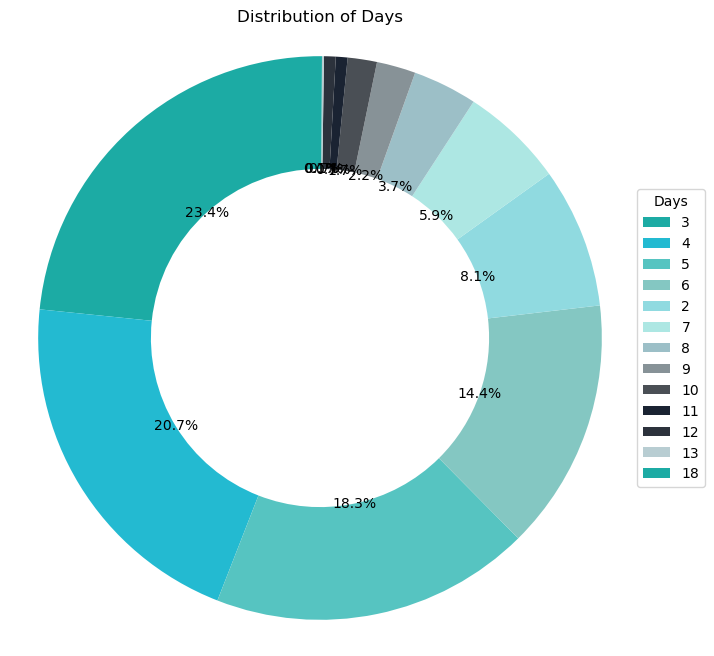

In [217]:
import matplotlib.pyplot as plt

# Define your custom color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

days_counts = df['Days'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(days_counts, labels=None, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=fyn_palette)
plt.title('Distribution of Days')
plt.axis('equal')  
plt.legend(days_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Days')  
plt.show()


### Packages for Nights 

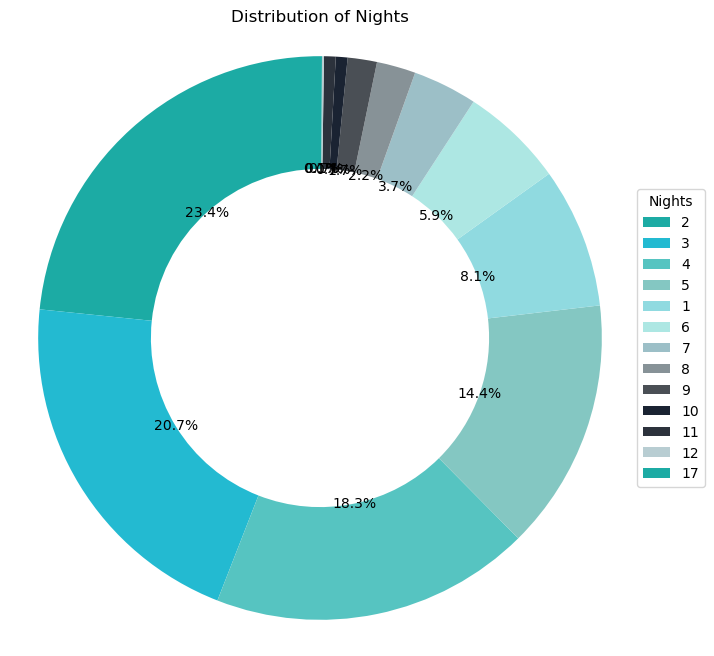

In [239]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the hex codes for the custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1','#84C7C2', '#90DAE0',
                '#ADE7E3','#9CBFC7', '#879297', '#4A4F55','#1A2332', '#2C323C','#B8CDD2']

# Create a ListedColormap using the custom palette
cmap = ListedColormap(fyn_palette)

# Calculate the value counts for number of nights
nights_counts = df['Nights'].value_counts()

# Plot the donut plot with custom colors
plt.figure(figsize=(8, 8))
plt.pie(nights_counts, labels=None, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=fyn_palette)
plt.title('Distribution of Nights')
plt.axis('equal')  
plt.legend(nights_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Nights')  
plt.show()


### Top 10 Cities

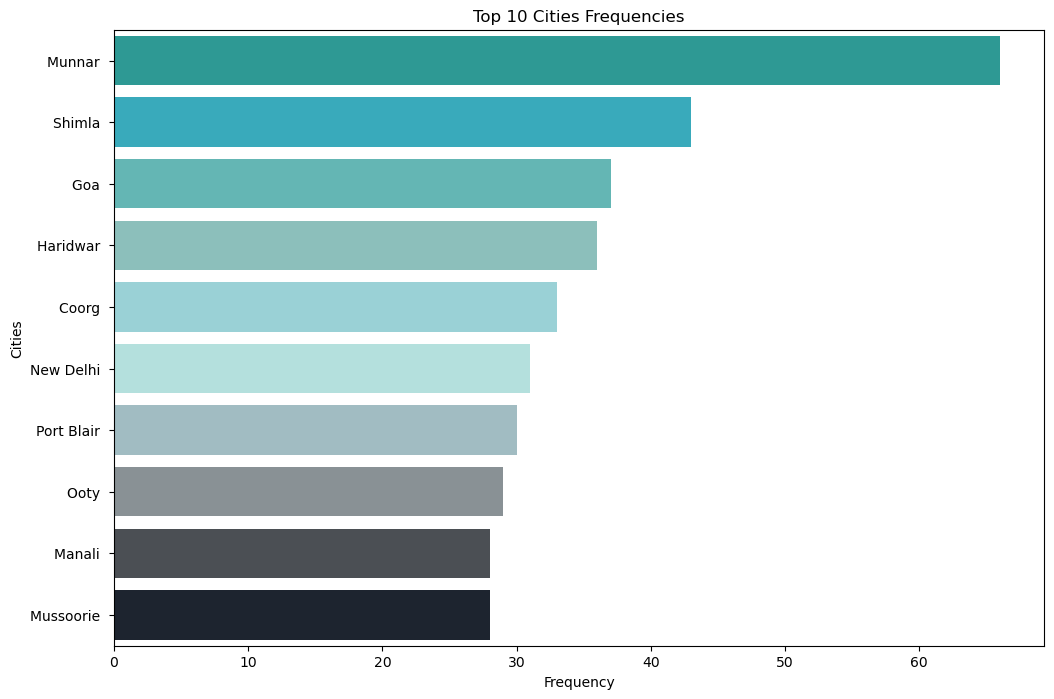

In [220]:
# Plotting code
plt.figure(figsize=(12, 8))
sns.countplot(y='Cities', data=df, order=df['Cities'].value_counts().index[:10], palette=fyn_palette)
plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Top 10 Cities Frequencies')
plt.show()

### Frequency of Cities

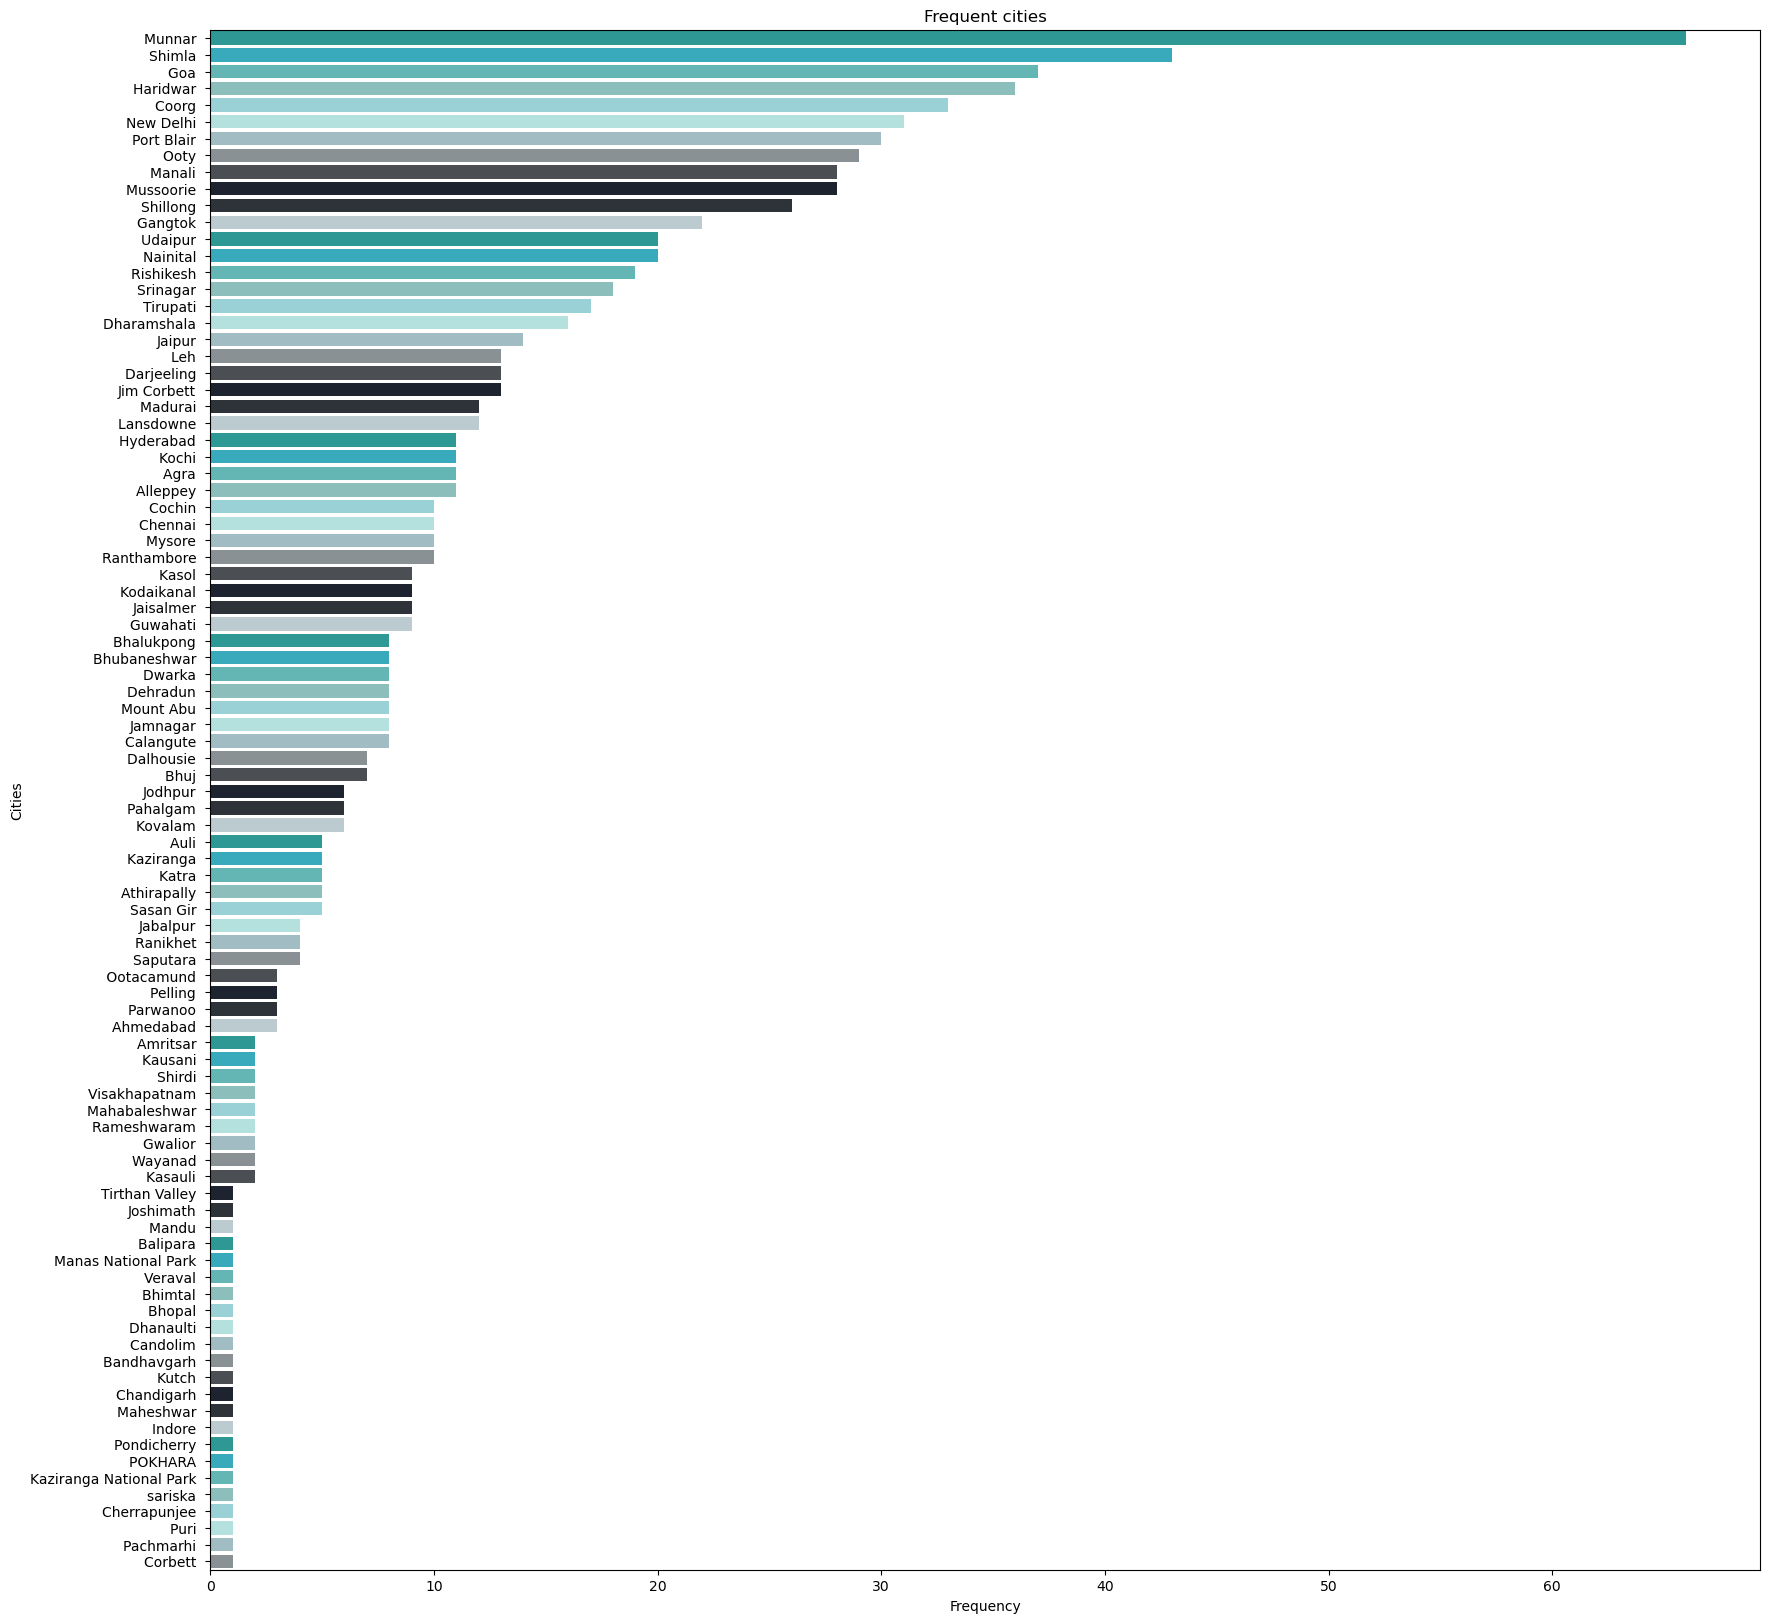

In [221]:
city_counts = df['Cities'].value_counts()

plt.figure(figsize=(20,20))
sns.barplot(x=city_counts.values[:], y=city_counts.index[:], palette=fyn_palette)
plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Frequent cities')
plt.show()


### Adventures and Non Adventures

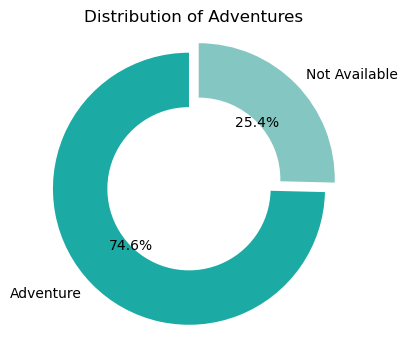

In [242]:
import matplotlib.pyplot as plt

# Calculate the counts of each category
adventure_counts = df['Adventures'].value_counts()
colors = ['#1CABA4', '#84C7C2']  # Custom colors for the plot

# Define explode values
explode = (0.1, 0)

# Reduce figure size
plt.figure(figsize=(4, 4))

# Plot the exploded pie chart with reduced size
plt.pie(adventure_counts, labels=adventure_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops=dict(width=0.4), explode=explode)

plt.title('Distribution of Adventures')
plt.axis('equal')
plt.show()


### Distribution of Nature

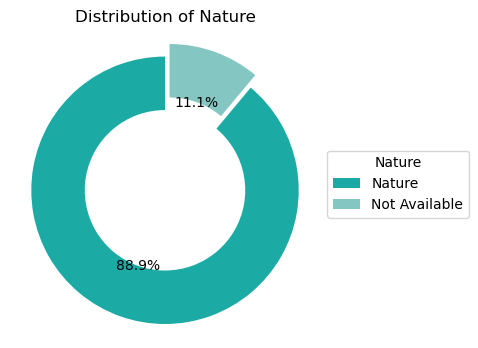

In [241]:
import matplotlib.pyplot as plt

# Calculate the counts of each category
nature_counts = df['Nature'].value_counts()
colors = ['#1CABA4', '#84C7C2']

# Define explode values
explode = (0.1, 0)

# Reduce figure size
plt.figure(figsize=(4, 4))

# Plot the exploded pie chart with reduced size
plt.pie(nature_counts, labels=None, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4), colors=colors, explode=explode)

plt.title('Distribution of Nature')
plt.axis('equal')
plt.legend(nature_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Nature')
plt.show()


### Distribution of Hill Station

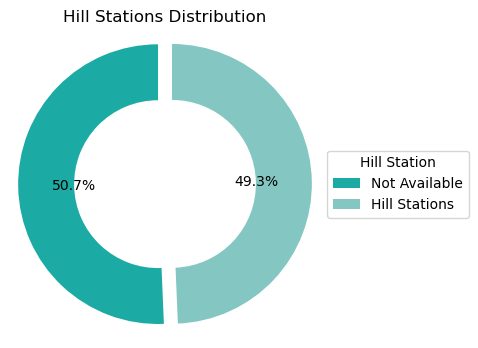

In [243]:
import matplotlib.pyplot as plt

# Calculate the counts of each category
hill_station_counts = df['Hill_Station'].value_counts()
colors = ['#1CABA4', '#84C7C2']

# Define explode values
explode = (0.1, 0)

# Reduce figure size
plt.figure(figsize=(4, 4))

# Plot the exploded pie chart with reduced size
plt.pie(hill_station_counts, labels=None, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4), colors=colors, explode=explode)

plt.title('Hill Stations Distribution')
plt.axis('equal')
plt.legend(hill_station_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Hill Station')
plt.show()

### Water Activities

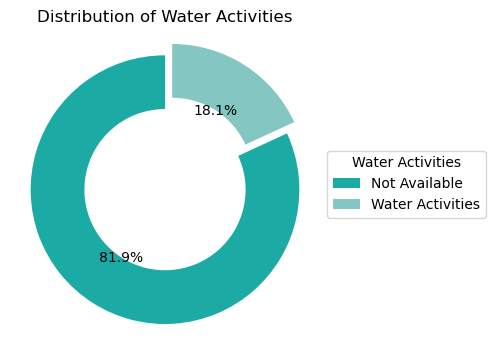

In [244]:
import matplotlib.pyplot as plt

# Calculate the counts of each category
water_activities_counts = df['Water_Activities'].value_counts()
colors = ['#1CABA4', '#84C7C2']

# Define explode values
explode = (0.1, 0)

# Reduce figure size
plt.figure(figsize=(4, 4))

# Plot the exploded pie chart with reduced size
plt.pie(water_activities_counts, labels=None, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4), colors=colors, explode=explode)

plt.title('Distribution of Water Activities')
plt.axis('equal')
plt.legend(water_activities_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Water Activities')
plt.show()


### Religious Packages

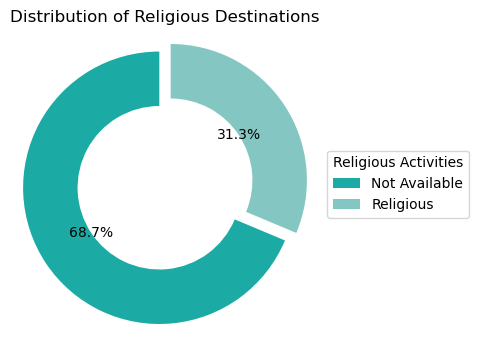

In [245]:
import matplotlib.pyplot as plt

# Calculate the counts of each category
religious_counts = df['Religious'].value_counts()
colors = ['#1CABA4', '#84C7C2']

# Define explode values
explode = (0.1, 0)

# Reduce figure size
plt.figure(figsize=(4, 4))

# Plot the exploded pie chart with reduced size
plt.pie(religious_counts, labels=None, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4), colors=colors, explode=explode)

plt.title('Distribution of Religious Destinations')
plt.axis('equal')
plt.legend(religious_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Religious Activities')
plt.show()


### Star_Hotels

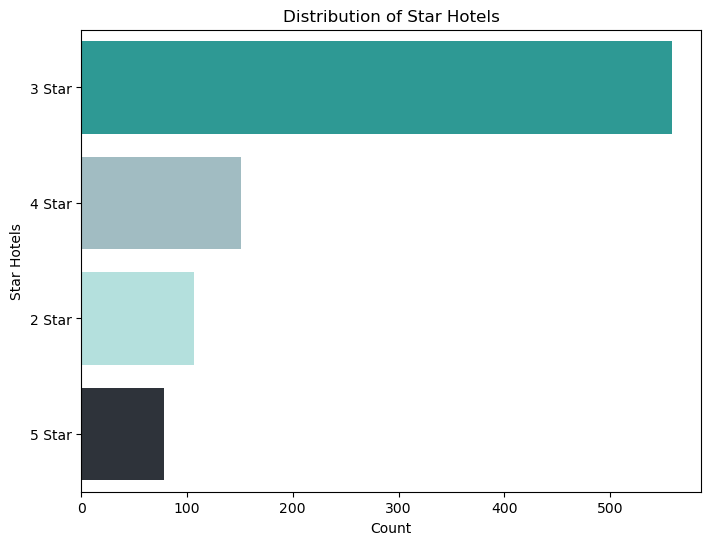

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the counts
starhotel_counts = df['Star_Hotels'].value_counts().reset_index()
starhotel_counts.columns = ['Star_Hotels', 'Count']

# Set the color palette
fyn_palette = ['#1CABA4', '#9CBFC7', '#ADE7E3', '#2C323C', '#23BAD1', '#90DAE0', '#56C4C1', '#84C7C2', '#879297', '#4A4F55', '#1A2332', '#B8CDD2']

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Star_Hotels', data=starhotel_counts, palette=fyn_palette)
plt.title('Distribution of Star Hotels')
plt.xlabel('Count')
plt.ylabel('Star Hotels')
plt.show()


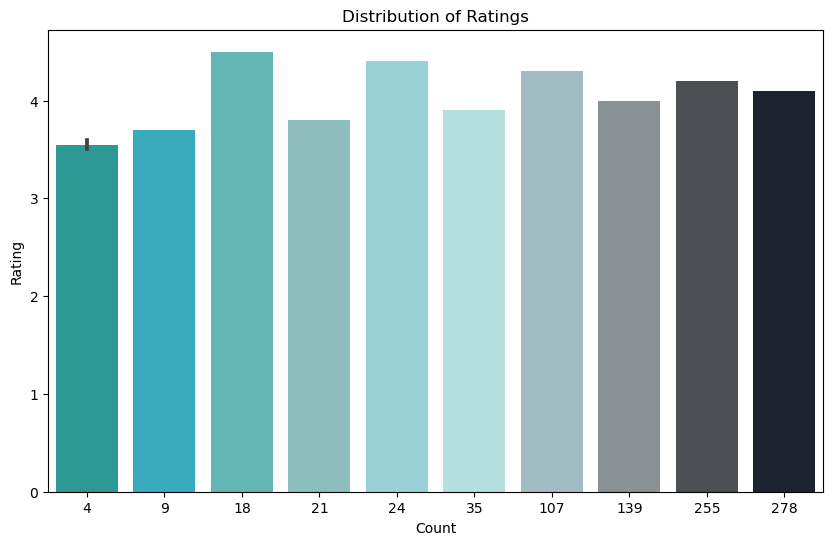

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique values and their counts in 'Ratings'
ratings_counts = df['Ratings'].value_counts().reset_index()
ratings_counts.columns = ['Rating', 'Count']

# Set the color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0', '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Sort ratings by count in descending order
ratings_counts = ratings_counts.sort_values(by='Count', ascending=False)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Rating', data=ratings_counts, palette=fyn_palette)
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


### Travellers Distribution

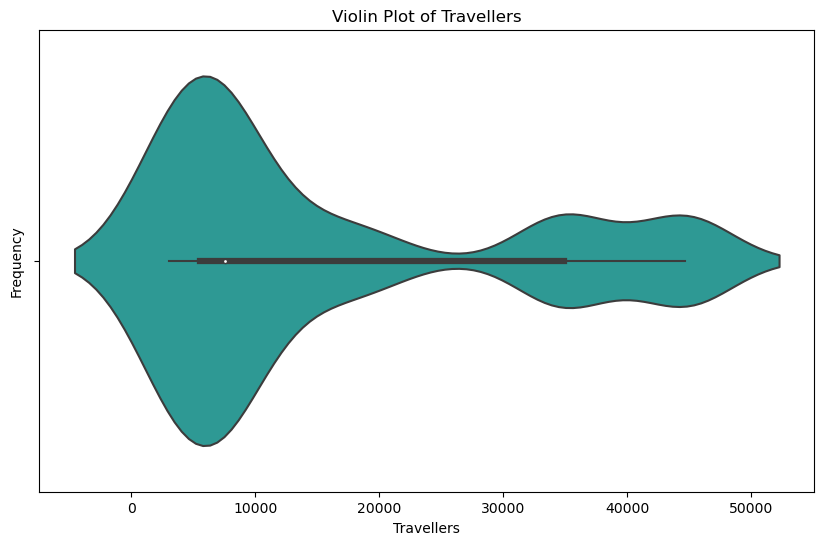

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Travellers'], color=fyn_palette[0])
plt.title('Violin Plot of Travellers')
plt.xlabel('Travellers')
plt.ylabel('Frequency')
plt.show()

## Reviews Distribution 

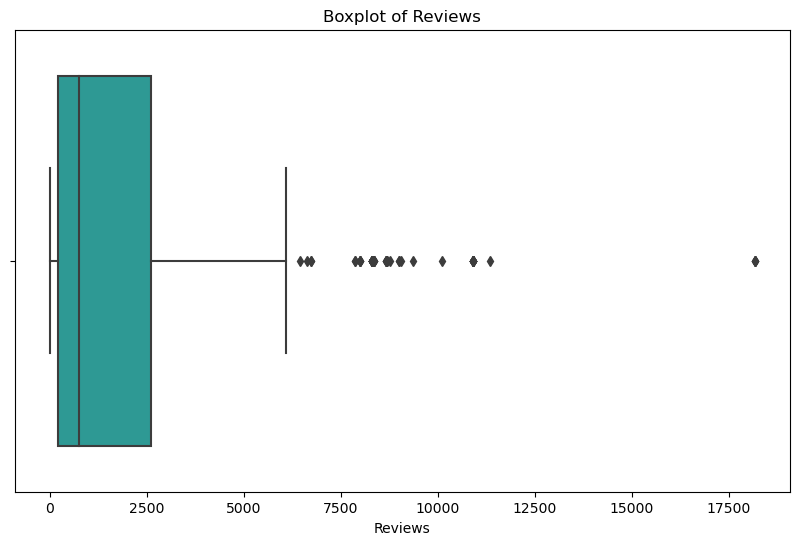

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Reviews'], color='#1CABA4')

# Adding title and labels
plt.title('Boxplot of Reviews')
plt.xlabel('Reviews')

# Show plot
plt.show()

# Bivariante Analysis - Non Visualization

In [62]:
import seaborn as sns

# Define the hex codes for the custom palette
fyn = ['#EEF4F4', '#E8E2E3', '#F5F5F5', '#BCCCCC',
               '#C8EBEE', '#888889', '#95C4C1', '#5BC0BC', '#2C2C2C']

# Set the custom palette
sns.set_palette(fyn)

### Analysis of Cities Per State

In [165]:
# Group by 'State' and count the number of cities in each state
state_cities_count = df.groupby('State')['Cities'].count().reset_index()

# Find the index of the row with the highest count
max_index = state_cities_count['Cities'].idxmax()

# Find the indices of the rows with the lowest count
min_indices = state_cities_count[state_cities_count['Cities'] == state_cities_count['Cities'].min()].index

# Custom color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Function to generate different background colors for each row
def generate_row_colors(index):
    colors = ['background-color: lightgray'] * len(index)
    
    # Highlight the row with the highest count
    colors[max_index] = f'background-color: {fyn_palette[0]}'
    
    # Highlight all rows with the lowest count
    for min_index in min_indices:
        colors[min_index] = f'background-color: {fyn_palette[4]}'
    
    return colors

# Stylize the result with a colored heading and different row colors
styled_state_cities_count = (
    state_cities_count
    .style
    .set_caption("Number of Cities per State")
    .set_table_styles([{'selector': 'caption',
                        'props': [('color', '#1A2332'), ('font-size', '16px'), ('font-weight', 'bold')]}])
    .apply(generate_row_colors, axis=0)  # Apply different row colors
)

# Display the stylized result
styled_state_cities_count


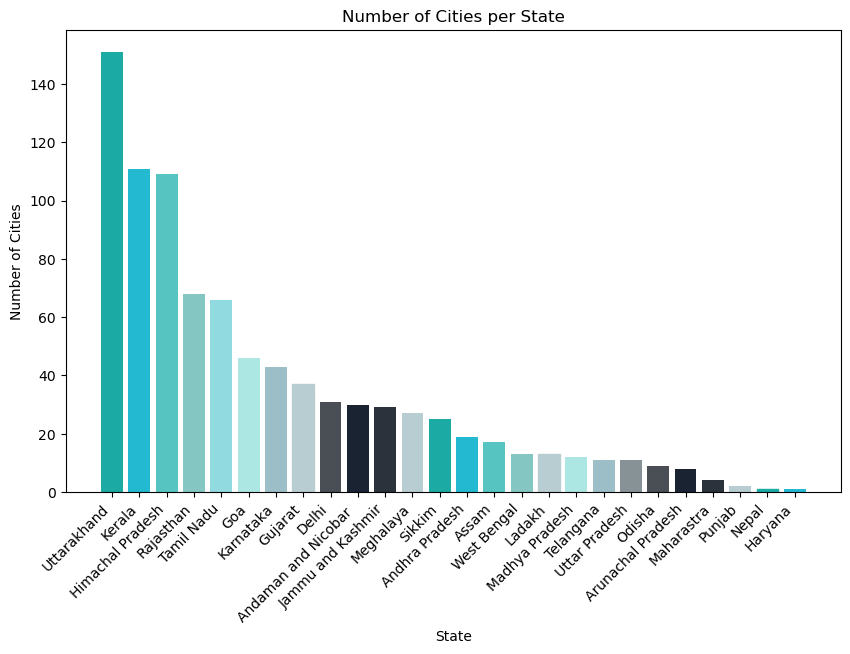

In [166]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'State' and 'Cities'
# Replace the following line with your actual DataFrame
# df = ...

# Group by 'State' and count the number of cities in each state
state_cities_count = df.groupby('State')['Cities'].count().reset_index()

# Sort the DataFrame by the counts in descending order
state_cities_count = state_cities_count.sort_values(by='Cities', ascending=False)

# Custom color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(state_cities_count['State'], state_cities_count['Cities'], color=fyn_palette)

# Highlight the bar with the highest count
max_index = state_cities_count['Cities'].idxmax()
bars[max_index].set_color(fyn_palette[0])

# Highlight all bars with the lowest count
min_indices = state_cities_count[state_cities_count['Cities'] == state_cities_count['Cities'].min()].index
for min_index in min_indices:
    bars[min_index].set_color(fyn_palette[-1])

plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.title('Number of Cities per State')
plt.xticks(rotation=45, ha='right')
plt.show()


**Insights**:
* Uttarakhand follows closely with 151 cities, showcasing its richness in scenic spots and attractions.
* Himachal Pradesh boasts the highest number of cities (109) in the dataset, making it a diverse and well-explored region for travel destinations
* Kerala offers a wide range of experiences across 111 cities, highlighting its popularity among travelers.
* Rajasthan, known for its vibrant culture and historical sites, has 68 cities, making it a key destination for exploration.
* Some states, such as Meghalaya, Punjab, and Nepal, have fewer cities in the dataset, indicating a potentially lesser-explored tourism landscape.
* Understanding the distribution of cities per state provides valuable insights into the geographical diversity and popularity of travel destinations. 
* This information can guide marketing strategies, helping businesses cater to specific regional preferences and interests. 
* Additionally, it aids travelers in exploring the variety of options available within each state.


### Exploring Price Distribution across Packages

In [190]:

# Group by 'Package_Names' and calculate the sum of 'Prices_After_Discount'
package_prices_sum = df.groupby('Package_Names')['Prices_After_Discount'].sum().reset_index()

# Find the index of the row with the highest price
max_index = package_prices_sum['Prices_After_Discount'].idxmax()

# Find the indices of the rows with the lowest price
min_indices = package_prices_sum[package_prices_sum['Prices_After_Discount'] == package_prices_sum['Prices_After_Discount'].min()].index

# Custom color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']



# Stylize the result with a colored heading and different row colors
styled_package_prices = (
    package_prices_sum
    .style
    .set_caption("Total Prices per Package")
    .set_table_styles([{'selector': 'caption',
                        'props': [('color', '#1A2332'), ('font-size', '16px'), ('font-weight', 'bold')]}])
    .apply(generate_price_colors, axis=0)  # Apply different row colors based on prices
)

# Display the stylized result
styled_package_prices


In [177]:
import plotly.express as px


# Custom color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a bivariate bubble chart using Plotly Express with Fyn Palette
fig = px.scatter(df, 
                 x='Package_Names', 
                 y='Prices_After_Discount',
                 size='Prices_After_Discount',  # Adjust size based on your preference
                 color='Prices_After_Discount',
                 color_continuous_scale=fyn_palette,
                 title='Price Distribution across Packages',
                 labels={'Prices_After_Discount': 'Total Price'})

fig.show()


### Insights
* **Diverse Destinations**: Packages cover a range of destinations, from serene hills to vibrant cultural experiences.
* **Varied Package Types**: Options include family tours, honeymoons, religious trips, and adventures.
* **Pricing Range**: Catering to different budgets, ensuring options for various travellers.
* **Popular Destinations**: Goa, Himachal, Uttarakhand, and Rajasthan are recurring favourites


### Travel Durations Analysis: Unveiling Patterns in Days vs. Nights Stay

In [179]:
# Extract relevant columns
travel_durations = df[['Days', 'Nights']]

# Create a cross-tabulation
cross_tab = pd.crosstab(travel_durations['Days'], travel_durations['Nights'])

# Highlight max and min values in each column
styled_cross_tab = cross_tab.style.apply(lambda x: ['background-color:#1CABA4 ' if value == x.max() else '' for value in x], axis=0)
styled_cross_tab.apply(lambda x: ['background-color:#23BAD1 ' if value == x.min() else '' for value in x], axis=0)


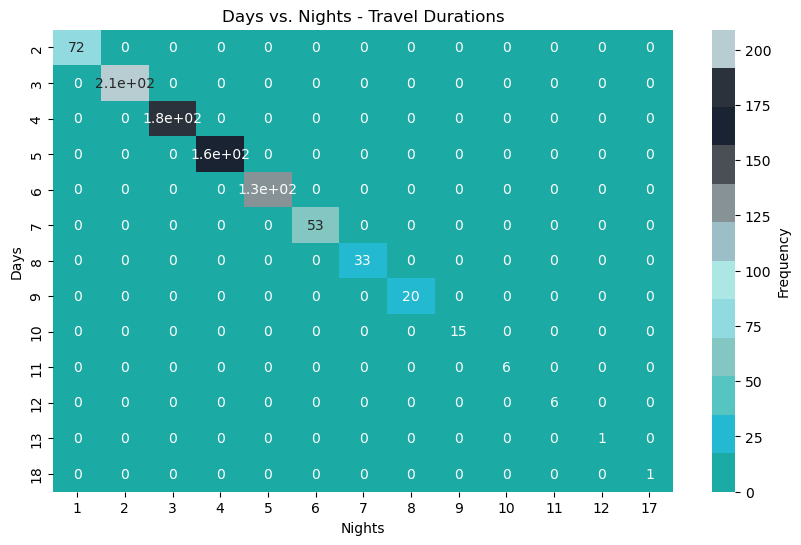

In [180]:
# Set a custom color palette (Fyn palette)
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a smaller heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap=fyn_palette, cbar_kws={'label': 'Frequency'})
plt.title('Days vs. Nights - Travel Durations')
plt.xlabel('Nights')
plt.ylabel('Days')
plt.show()

### Insights

* For the given travel durations (Days vs. Nights), here are some insights:
   * The majority of travel instances involve 2 days and 1 night stays (72 instances).
   * Other popular durations include 3 days and 2 nights (209 instances), and 4 days and 3 nights (185 instances).
   * Longer durations, such as 11 days and 10 nights, 12 days and 11 nights, and 17 days and 16 nights, have fewer instances.
   * There are no instances where the number of nights is greater than the number of days.
   * The heatmap visually emphasizes the varying frequencies of travel durations.
**Note**: The provided insights are based on the frequency of occurrences for each combination of days and nights.


### Unveiling Discounts: Original Prices vs. Discounted Deals

In [182]:
# Group by Cities and calculate the sum of Prices_Before_Discount and Prices_After_Discount
prices_by_city = df.groupby('Cities')[['Prices_Before_Discount', 'Prices_After_Discount']].mean()

# Highlight max and min values in each column
styled_prices_by_city = (
    prices_by_city
    .style
    .apply(lambda x: ['background-color:#1CABA4' if value == x.max() else '' for value in x], axis=0)
    .apply(lambda x: ['background-color:#23BAD1' if value == x.min() else '' for value in x], axis=0)
)
styled_prices_by_city


In [181]:
# Group by Cities and calculate the mean of Prices_Before_Discount and Prices_After_Discount
prices_by_city = df.groupby('Cities')[['Prices_Before_Discount', 'Prices_After_Discount']].mean().reset_index()

# Custom color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0', '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', 
               '#1A2332', '#2C323C', '#B8CDD2']

# Create a bubble chart with Plotly using the custom palette
fig = px.scatter(prices_by_city, 
                 x='Prices_Before_Discount', 
                 y='Prices_After_Discount', 
                 size='Prices_Before_Discount', 
                 color='Cities',
                 labels={'Prices_Before_Discount': 'Prices Before Discount', 
                         'Prices_After_Discount': 'Prices After Discount'},
                 title='Prices Before vs. After Discount',
                 color_discrete_sequence=fyn_palette,
                 )

# Add custom highlighting for max and min values
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)), selector=dict(mode='markers'))
fig.update_traces(marker=dict(size=14, line=dict(color='#ffffff', width=2)), selector=dict(mode='markers'))

# Show the plot
fig.show()

### Insights	
* Wide Price Range: 
   * There is a considerable variation in average prices across different cities, indicating  that the cost of travel varies significantly from one destination to another.
* Popular Tourist Destinations: 
   * Some cities, such as Jaipur, Goa, Shimla, and Srinagar, appear to be popular tourist destinations based on their relatively higher average prices.
* Affordable Destinations: 
   * On the other hand, cities like Shirdi and Sariska have lower average prices, suggesting that they might be more budget-friendly or have lower travel costs.


#### Stylizing dataframe

In [75]:
import pandas as pd

# Assuming your DataFrame is named df
# Group by 'Cities' and calculate the mean of 'Travellers' and 'Ratings'
travellers_ratings_by_city = df.groupby('Cities')[['Travellers', 'Ratings']].mean()

# Define Fyn palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0', '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Stylize the output
styled_travellers_ratings = (
    travellers_ratings_by_city
    .style
    .background_gradient(cmap='Greys', subset=['Travellers', 'Ratings'], axis=0)
    .apply(lambda x: ['background-color:{}'.format(fyn_palette[0]) if value == x.max() else '' for value in x], axis=0, subset=['Travellers', 'Ratings'])
    .apply(lambda x: ['background-color:{}'.format(fyn_palette[1]) if value == x.min() else '' for value in x], axis=0, subset=['Travellers', 'Ratings'])
    .set_caption('Travellers vs. Ratings by City')
)

# Display the stylized result
styled_travellers_ratings


### Travellers and Ratings by City: Unraveling Customer Insights Across Destinations

In [78]:
# Function to generate different background colors for each row
def generate_row_colors(val, column):
    colors = ['background-color: lightgray'] * len(val)
    
    # Highlight the row with the highest Travellers
    max_index = val.idxmax()
    colors[val.index.get_loc(max_index)] = f'background-color: {fyn_palette[0]}'
    
    # Highlight the row with the lowest Travellers
    min_index = val.idxmin()
    colors[val.index.get_loc(min_index)] = f'background-color: {fyn_palette[4]}'
    
    # Highlight all rows with the highest Ratings
    max_indices_ratings = val[val == val.max()].index
    for idx in max_indices_ratings:
        colors[val.index.get_loc(idx)] = f'background-color: {fyn_palette[1]}'
    
    # Highlight all rows with the lowest Ratings
    min_indices_ratings = val[val == val.min()].index
    for idx in min_indices_ratings:
        colors[val.index.get_loc(idx)] = f'background-color: {fyn_palette[5]}'
    
    return colors

# Stylize the result with a colored heading and different row colors
styled_travellers_ratings = (
    travellers_ratings_by_city
    .style
    .set_caption("Average Travellers and Ratings by City")
    .set_table_styles([{'selector': 'caption',
                        'props': [('color', '#1A2332'), ('font-size', '16px'), ('font-weight', 'bold')]}])
    .apply(generate_row_colors, column=['Travellers', 'Ratings'])
)

# Display the stylized result
styled_travellers_ratings


In [184]:
import plotly.express as px
import plotly.colors
travellers_ratings_by_city = df.groupby('Cities')[['Travellers', 'Ratings']].mean()
# Assuming 'fyn_palette' is your custom palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Convert custom palette to a color scale
fyn_colorscale = plotly.colors.make_colorscale(fyn_palette)

# Create a scatter plot with marginal points using Plotly Express
fig = px.scatter(df, x='Travellers', y='Ratings', marginal_x='histogram', marginal_y='histogram', color='Travellers',
                 color_continuous_scale=fyn_colorscale,  # Use the custom palette
                 title='Scatter Plot with Marginal Points (Travellers vs. Ratings)')

# Show the plot
fig.show()

### Insights 
* Travellers and Ratings Variation:
   * The number of travelers and ratings varies significantly across different cities, indicating diverse preferences and popularity among tourists.
   * Cities like "Calangute," "Cochin," and "Munnar" have a high average number of travelers, suggesting they are popular destinations.
* Destination Popularity:
   * Ooty," "Agra," and "Ahmedabad" show a high average number of travelers and positive ratings, indicating their popularity among tourists.
   * "Kasauli" has a lower average number of travelers, and the ratings are comparatively lower, suggesting it might be a less-visited destination.
* Highly Rated Destinations:
   * Some cities like "Port Blair," "POKHARA," and "Goa" have both high average traveler numbers and ratings, indicating a positive tourist experience.
* Diverse Preferences:
    * Cities like "Auli" and "Pahalgam" have fewer travelers but high ratings, suggesting they might cater to a specific niche or offer unique experiences.
* Customer Satisfaction:
   * The ratings, on average, are above 4.0 for most cities, indicating overall customer satisfaction with the travel packages or experiences.


### Customer Sentiments Across Star Hotels: Decoding Varied Ratings and Preferences

In [185]:
df.groupby('Star_Hotels')['Ratings'].unique().reset_index()

Star_Hotels                                            Ratings
0      2 Star           [4.2, 4.3, 4.1, 4.0, 3.8, 3.6, 3.7, 3.9]
1      3 Star  [4.2, 4.1, 4.5, 4.3, 4.0, 3.9, 4.4, 3.7, 3.5, ...
2      4 Star           [4.0, 4.2, 4.1, 4.3, 4.4, 4.5, 3.5, 3.8]
3      5 Star                [4.2, 4.1, 4.3, 4.4, 4.0, 4.5, 3.8]

In [79]:
# Create a color dictionary for each unique rating
unique_ratings = sorted(df['Ratings'].unique())
color_dict = dict(zip(unique_ratings, fyn_palette[:len(unique_ratings)]))

# Pivot the DataFrame for creating a stacked bar chart
df_pivot = df.pivot_table(index='Star_Hotels', columns='Ratings', aggfunc='size', fill_value=0)

# Reset index for proper data structure
df_pivot.reset_index(inplace=True)

# Melt the DataFrame for Plotly
df_melted = pd.melt(df_pivot, id_vars='Star_Hotels', var_name='Rating', value_name='Count')

# Create a vertical stacked bar chart using Plotly Express with fyn_palette
fig = px.bar(df_melted, x='Star_Hotels', y='Count', color='Rating',
             color_discrete_map=color_dict, title=' Ratings for Each Star_Hotel',
             labels={'Count': 'Number of Ratings', 'Star_Hotels': 'Star Hotels'},
             category_orders={'Star_Hotels': sorted(df['Star_Hotels'].unique())},
             width=800, height=500)

# Show the plot
fig.show()

### Insights:
* 2 Star Hotels: Ratings range from 3.6 to 4.3, indicating a mix of opinions.
* 3 Star Hotels: Varied ratings from 3.5 to 4.5, with some hotels receiving higher scores.
* 4 Star Hotels: Positive feedback, ratings between 3.5 and 4.5.
* 5 Star Hotels: Consistently high ratings (3.8 to 4.5), reflecting overall satisfaction.
### Overall:
* Positive sentiments across all categories.
* Higher ratings for 5 Star Hotels suggest a positive correlation between luxury offerings and customer satisfaction.
* Individual hotel experiences within each category influence diverse customer opinions.

### Conclusion of Bivariante Analysis
* In conclusion, the bivariate analysis has revealed crucial insights
   * Discounts: The extent of discounts applied.
   * Travel Durations: Typical durations based on days and nights.
   * Regional Preferences: Popular packages across cities.
   * Customer Satisfaction: Ratings and traveler numbers correlation.
   * Hotel Ratings: Relationship with star categories, impacting customer perceptions and business decisions


In [89]:
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame with columns 'Cities' and 'Travellers'
# Replace the following line with your actual DataFrame
# df = ...

# Create a pivot table
pivot_table = pd.pivot_table(df, index='Cities', values='Travellers', aggfunc='sum')

# Find the city with the highest and lowest number of travellers
max_city = pivot_table.idxmax().values[0]
min_city = pivot_table.idxmin().values[0]

# Custom color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Function to generate different background colors for each element
def generate_element_colors(value):
    #colors = ['background-color: lightgray'] * len(series.index)
    if value == pivot_table.loc[max_city, 'Travellers']:
        return f'background-color: {fyn_palette[0]}'
    elif value == pivot_table.loc[min_city, 'Travellers']:
        return f'background-color: {fyn_palette[4]}'
    else:
        return ''

# Apply the function element-wise
styled_table = (
    pivot_table
    .style
    .set_caption("Travellers per City")
    .set_table_styles([{'selector': 'caption',
                        'props': [('color', '#1A2332'), ('font-size', '16px'), ('font-weight', 'bold')]}])
    .applymap(generate_element_colors)  # Apply different element colors
)

# Display the stylized pivot table
styled_table


In [90]:
import pandas as pd
import plotly.express as px

# Assuming pivot_table is your DataFrame with 'Cities' as the index and 'Travellers' as values
# Replace the following line with your actual DataFrame
# pivot_table = ...

# Sort the DataFrame by the total travellers in descending order
pivot_table = pivot_table.sort_values(by='Travellers', ascending=False)

# Set your custom fyn_palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create a lollipop plot with Plotly Express
fig = px.scatter(x=pivot_table.index, y=pivot_table['Travellers'],
                 title=' Travellers per City ',
                 labels={'x': 'Cities', 'y': 'Total Travellers'},
                 width=800, height=400)

# Adjust the marker settings to add some gap between each city and use the fyn_palette
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGray')),
                  marker_color=fyn_palette[0])  # You can choose the color from the palette

# Show the plot
fig.show()


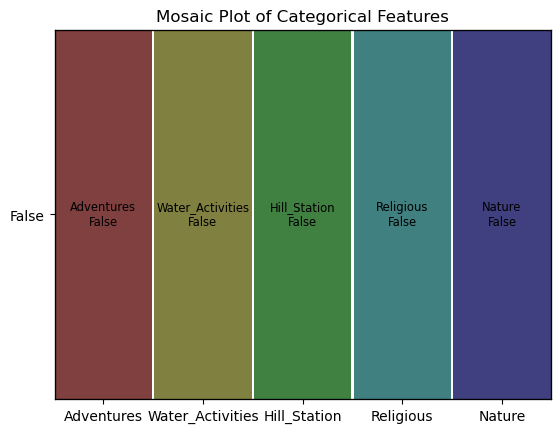

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming 'df' is your DataFrame with the mentioned categorical features

# Create a new DataFrame for the categorical features
categorical_df = df[['Adventures', 'Water_Activities', 'Hill_Station', 'Religious', 'Nature']]

# Convert categorical columns to boolean (1 for True, 0 for False)
categorical_df = categorical_df.apply(lambda x: x == 'Yes')

# Melt the DataFrame for plotting
melted_df = categorical_df.melt()

# Create a mosaic plot
mosaic(melted_df, ['variable', 'value'], title='Mosaic Plot of Categorical Features')
plt.show()


# Mulitivariante Analysis

### Comprehensive Travel Package Analysis: TreeMap Visualization


In [132]:
# Define functions for highlighting highest and lowest values in each column using the Fyn palette
def highlight_max_min(s):
    is_max = s == s.max()
    is_min = s == s.min()
    colors = ['background-color: ' + fyn_palette[0] if v else 'background-color: ' + fyn_palette[1] if w else '' for v, w in zip(is_max, is_min)]
    return colors

# Apply the styling to the pivot table
styled_table = pivot_table.style.apply(highlight_max_min)

# Display the styled table
styled_table.to_excel('styled_table.xlsx', engine='openpyxl', index=False)
styled_table



In [133]:
import pandas as pd
import plotly.express as px

# Define the Fyn palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Assuming 'df' is your DataFrame

# Create a pivot table
pivot_table = pd.pivot_table(df, 
                             index=['Cities', 'Package_Names', 'Days', 'Nights'],
                             values=['Prices_After_Discount', 'Travellers'],
                             aggfunc={'Prices_After_Discount': 'mean', 'Travellers': 'sum'})

# Reset index to make 'Cities' a regular column
pivot_table = pivot_table.reset_index()

# Create TreeMap with Fyn palette
fig = px.treemap(pivot_table, 
                 path=['Cities', 'Package_Names', 'Days', 'Nights'],
                 values='Prices_After_Discount',  # Adjust according to your needs
                 color='Travellers',  # Color based on Travellers
                 color_continuous_scale=fyn_palette,  # Use Fyn palette
                 title='TreeMap Visualization - Travel Package Analysis')

# Show the plot
fig.show()


### Insights
* 1. Munnar Domance
   * Munnar Attracts Most Packages: Munnar emerges as the top destination with the highest number of travel packages.
* 2. Diverse Offerings
   * Destination Diversity: The dataset covers a range of destinations, catering to diverse traveler interests.
* 3.Traveler Preferences
   * Munnar Leads in Traveler Interest: Munnar not only has the most packages but also attracts the highest number of travelers.
* 4. Varied Durations
   * Package Duration Preferences: Analyzing traveler choices regarding the duration of packages could uncover insights into preferred trip lengths.


### Duration-Based Travel Analysis

In [186]:
import plotly.graph_objects as go

result_df = df.groupby(['Cities', 'Days', 'Nights']).sum().reset_index()
result_df = result_df.sort_values(by=['Cities', 'Days', 'Nights'],ascending=False)

# Print or use result_df as needed
result_df

result_df['Days_Nights'] = result_df['Days'].astype(str) + ' Days / ' + result_df['Nights'].astype(str) + ' Nights'

# Custom color palette
fyn_palette = ['#1CABA4','#23BAD1',  '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Grouping by combined 'Days_Nights' and summing 'Travellers'
days_nights_df = result_df.groupby('Days_Nights')['Travellers'].sum().reset_index()

# Extracting data for the donut chart
labels = days_nights_df['Days_Nights']
values = days_nights_df['Travellers']

# Create a donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5, marker=dict(colors=fyn_palette))])

# Update the layout to create a donut chart
fig.update_layout(title_text="Travelers based on Duration (Days/Nights)")

# Show the plot
fig.show()


In [188]:
import pandas as pd

# Sample DataFrame
data = {
    'Days_Nights': ['10 Days / 9 Nights', '11 Days / 10 Nights', '12 Days / 11 Nights', '13 Days / 12 Nights',
                    '18 Days / 17 Nights', '2 Days / 1 Nights', '3 Days / 2 Nights', '4 Days / 3 Nights',
                    '5 Days / 4 Nights', '6 Days / 5 Nights', '7 Days / 6 Nights', '8 Days / 7 Nights',
                    '9 Days / 8 Nights'],
    'Travellers': [222973, 70796, 78816, 34932, 20148, 843088, 2402352, 3524487, 3013957, 1919103, 944495, 512588, 522494]
}

df2 = pd.DataFrame(data)

# Define the Fyn palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Define functions for highlighting highest and lowest values in each column
def highlight_max_min(val):
    color = fyn_palette[0] if val == df2['Travellers'].max() else fyn_palette[1] if val == df2['Travellers'].min() else ''
    return f'background-color: {color}'

# Apply the styling to the DataFrame
styled_df = df2.style.applymap(highlight_max_min)

# Save the styled DataFrame to Excel
styled_df.to_excel('styled_df.xlsx', engine='openpyxl', index=False)
styled_df

### Insights
* The analysis of travelers' distribution based on trip duration provides valuable insights into the popularity and preferences of travelers. The key observations include:
   * 1. Peak Travel Duration: The analysis reveals that trips with a duration of '3 Days / 2 Nights' attract the highest number of travelers, with a substantial count of 2,402,352.
   * 2. Short Duration Trips: Short-duration trips, such as '2 Days / 1 Night,' also demonstrate significant popularity, recording a remarkable traveler count of 843,088.
    * 3. Gradual Decline: As the duration of trips increases beyond the optimum range, the number of travelers starts to decline. This is evident in the decreasing trend observed in trips lasting more than 3 days.
    * 4. Longer Duration Insights: Trips with durations exceeding one week (7 days) show a gradual decrease in traveler counts. The decline is particularly noticeable in trips lasting '8 Days / 7 Nights' and '9 Days / 8 Nights.'
    * 5. Unique Trend:A unique observation is the spike in traveler count for the '10 Days / 9 Nights' trip duration, standing out among other durations.
* These insights can be crucial for travel planners, agencies, and destination managers to tailor their offerings, marketing strategies, and services based on the observed traveler preferences


### Exploring Travel Package Pricing: 

In [192]:
# Define Fyn palette
fyn_palette = ['#1CABA4', '#23BAD1']

# Define functions for highlighting highest and lowest values in each column
def highlight_max_min(s):
    is_max = s == s.max()
    is_min = s == s.min()
    return ['background-color: ' + fyn_palette[0] if v else 'background-color: ' + fyn_palette[1] if w else '' for v, w in zip(is_max, is_min)]

# Apply the styling to the DataFrame
styled_df = grouped_prices.style.apply(highlight_max_min)

# Display the styled DataFrame
styled_df.to_excel('styled_grouped_prices.xlsx', engine='openpyxl', index=False)
styled_df


In [191]:
import plotly.express as px

# Group by 'Package_Names' or 'Cities' and calculate the mean of prices
grouped_prices = df.groupby('Cities')[['Prices_Before_Discount', 'Prices_After_Discount']].mean().reset_index()

# Define Fyn palette
fyn_palette = ['#1CABA4', '#23BAD1']

# Plotting with Plotly
fig = px.line(grouped_prices, x='Cities', y=['Prices_Before_Discount', 'Prices_After_Discount'],
              labels={'value': 'Mean Prices', 'Cities': 'Package Names'},
              title='Comparison of Prices Before and After Discount',
              line_shape='linear',
              line_dash_sequence=['solid', 'solid'],
              color_discrete_sequence=fyn_palette,
              markers=True,  # Include markers
              )

# Show the plot
fig.show()


### Insights
* High Prices:
    * Leh has one of the highest average prices both before and after discounts.
    * Cities like Jim Corbett, Chandigarh, and Goa also exhibit relatively high average prices after discounts.
* Low Prices:
    * Sariska has the lowest average prices, both before and after discounts.
    * Ranthambore and Puri also have relatively lower average prices.
* Discount Effect:
    * Generally, there is a noticeable reduction in prices after discounts for most locations.
* Price Discrepancies:
    * There are significant variations in average prices among different cities and package names.


### Analysis of Travel Package Preferences

In [193]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have defined the fyn_palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0']

# Create a new DataFrame with counts
funnel_data = df[['Adventures', 'Nature', 'Hill_Station', 'Water_Activities', 'Religious']].apply(pd.value_counts).fillna(0)

# Transpose the DataFrame for plotting
funnel_data = funnel_data.T

# Create funnel chart
fig = go.Figure()

for i, category in enumerate(funnel_data.index):
    fig.add_trace(go.Funnel(
        name=category,
        y=funnel_data.columns,
        x=funnel_data.loc[category],
        textinfo='value+percent initial',
        hoverinfo='all',
        marker=dict(color=fyn_palette[i])
    ))

# Update layout
fig.update_layout(
    title='Funnel Chart for 5 Features with Package Counts ',
    xaxis_title='Counts',
    yaxis_title='Categories',
    showlegend=True,
)

# Show the plot
fig.show()


In [194]:
# Your DataFrame
data = {
    'Adventure': [667.0, 0.0, 0.0, 0.0, 0.0],
    'Hill Stations': [0.0, 0.0, 441.0, 0.0, 0.0],
    'Nature': [0.0, 795.0, 0.0, 0.0, 0.0],
    'Not Available': [227.0, 99.0, 453.0, 732.0, 614.0],
    'Religious': [0.0, 0.0, 0.0, 0.0, 280.0],
    'Water Activities': [0.0, 0.0, 0.0, 162.0, 0.0]
}

df3 = pd.DataFrame(data, index=['Adventures', 'Nature', 'Hill_Station', 'Water_Activities', 'Religious'])

# Highlight maximum value in each column
styled_df = df3.style.highlight_max(axis=0, color='#1CABA4', subset=df3.columns)

# Display the styled DataFrame
styled_df

### Insights 
* Adventures:
   * Highly preferred category with 667 travel packages.
* Nature:
   * Dominated by 795 travel packages, showing a strong preference.
* Hill Stations:
   * Well-distributed with 441 travel packages, indicating general interest.
* Water Activities:
   * Significant interest, with 732 travel packages and 162 dedicated to water activities.
* Religious:
   * Notable preference, combining 614 general and 280 religious-focused travel packages.
* Not Available:
   * Substantial counts, especially in 'Not Available' for Adventures and Religious, suggesting potential data gaps or different categorizations.


### Package Counts Across Different Features

In [195]:
import plotly.graph_objects as go

# Define the fyn_palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2','#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2','#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Extract categories and counts from the packages_count dictionary
categories = list(packages_count.keys())
counts = list(packages_count.values())

# Create an Arc diagram
fig = go.Figure()

for category, count, color in zip(categories, counts, fyn_palette):
    fig.add_trace(go.Scatterpolar(
        r=[count],
        theta=[category],
        mode='markers+lines',
        name=category,
        marker=dict(size=16, color=color),
        line=dict(color=color, width=2)
    ))

# Update layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True)
    ),
    showlegend=True,
    title='Arc Diagram for Package Counts with Features',
)

# Show the plot
fig.show()


In [197]:
df5 = pd.DataFrame({'Categories': categories, 'Counts': counts})

# Highlight max and min values
styled_df = df5.style.highlight_max(color='#1CABA4').highlight_min(color='#23BAD1')

# Display the styled DataFrame
styled_df

### Insights
* Individual Features:
   * The categories with the highest counts for individual features are:
      * Nature: 795
      * Adventures: 667
      * Hills: 441
* Combined Features:
   * Combinations involving Nature and Adventures (Adv_Nature) have the highest count at 618.
   * Religious_Water_Nature and Religious_Adv_Nature also have notable counts at 35 and 158, respectively.
* Religious Features:
   * The Religious category has various combinations with other features, indicating diverse travel preferences.
   * Religious_Nature has the highest count within the Religious category at 241.
* Water Features:
  * Water_Nature has the highest count among water-related combinations at 152.
  * Water_Hills_Adv_Nature has a combined count of 70.
* Hill Stations Features:
  * Hills_Nature and Hills_Adv_Nature are the most prevalent combinations with counts of 423 and 338, respectively.
* Multi-Feature Combinations:
   * Adv_Religious_Hills_Water_Nature, a combination of all features, has a count of 22.


### Package Connections Overview

In [198]:
packages_count = {
    'Religious': df[df['Religious'] == 'Religious'].shape[0],
    'Water': df[df['Water_Activities'] == 'Water Activities'].shape[0],
    'Hills': df[df['Hill_Station'] == 'Hill Stations'].shape[0],
    'Adventures': df[df['Adventures'] == 'Adventure'].shape[0],
    'Nature': df[df['Nature'] == 'Nature'].shape[0],
    'Religious_Water': df[(df['Religious'] == 'Religious') & (df['Water_Activities'] == 'Water Activities')].shape[0],
    'Religious_Hills': df[(df['Religious'] == 'Religious') & (df['Hill_Station'] == 'Hill Stations')].shape[0],
    'Religious_Adv': df[(df['Religious'] == 'Religious') & (df['Adventures'] == 'Adventure')].shape[0],
    'Religious_Nature': df[(df['Religious'] == 'Religious') & (df['Nature'] == 'Nature')].shape[0],
    'Water_Adv': df[(df['Water_Activities'] == 'Water Activities') & (df['Adventures'] == 'Adventure')].shape[0],
    'Water_Hills': df[(df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations')].shape[0],
    'Water_Nature': df[(df['Water_Activities'] == 'Water Activities') & (df['Nature'] == 'Nature')].shape[0],
    'Hills_Adv': df[(df['Hill_Station'] == 'Hill Stations') & (df['Adventures'] == 'Adventure')].shape[0],
    'Hills_Nature': df[(df['Hill_Station'] == 'Hill Stations') & (df['Nature'] == 'Nature')].shape[0],
    'Adv_Nature': df[(df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature')].shape[0],
    'Religious_Water_Hills': df[(df['Religious'] == 'Religious') & (df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations')].shape[0],
    'Religious_Water_Adv': df[(df['Religious'] == 'Religious') & (df['Water_Activities'] == 'Water Activities') & (df['Adventures'] == 'Adventure')].shape[0],
    'Religious_Water_Nature': df[(df['Religious'] == 'Religious') & (df['Water_Activities'] == 'Water Activities') & (df['Nature'] == 'Nature')].shape[0],
    'Religious_Hilsl_Adv': df[(df['Religious'] == 'Religious') & (df['Hill_Station'] == 'Hill Stations') & (df['Adventures'] == 'Adventure')].shape[0],
    'Religious_HIlls_Nature': df[(df['Religious'] == 'Religious') & (df['Hill_Station'] == 'Hill Stations') & (df['Nature'] == 'Nature')].shape[0],
    'Religious_Adv_Nature': df[(df['Religious'] == 'Religious') & (df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature')].shape[0],
    'Water_Hills_Adv': df[(df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations') & (df['Adventures'] == 'Adventure')].shape[0],
    'Water_Hills_Nature': df[(df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations') & (df['Nature'] == 'Nature')].shape[0],
    'Water_Adv_Nature': df[(df['Water_Activities'] == 'Water Activities') & (df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature')].shape[0],
    'Hills_Adv_Nature': df[(df['Hill_Station'] == 'Hill Stations') & (df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature')].shape[0],
    'Religious_Water_Hills_Adv': df[(df['Religious'] == 'Religious') & (df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations') & (df['Adventures'] == 'Adventure')].shape[0],
    'Religious_Water_Hills_Nature': df[(df['Religious'] == 'Religious') & (df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations') & (df['Nature'] == 'Nature')].shape[0],
    'Religious_Water_Adv_Nature': df[(df['Religious'] == 'Religious') & (df['Water_Activities'] == 'Water Activities') & (df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature')].shape[0],
    'Religious_Hills_Adv_Nature': df[(df['Religious'] == 'Religious') & (df['Hill_Station'] == 'Hill Stations') & (df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature')].shape[0],
    'Water_Hills_Adv_Nature': df[(df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations')&(df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature')].shape[0],
    'Adv_Religious_Hills_Water_Nature': df[(df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations')&(df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature') & (df['Religious'] == 'Religious')].shape[0]
}


In [199]:
import plotly.graph_objects as go
import pandas as pd

# Your packages_count dictionary
packages_count = {
    'Religious': 280, 'Water': 162, 'Hills': 441, 'Adventures': 667, 'Nature': 795,
    'Religious_Water': 37, 'Religious_Hills': 126, 'Religious_Adv': 173, 'Religious_Nature': 241,
    'Water_Adv': 148, 'Water_Hills': 72, 'Water_Nature': 152, 'Hills_Adv': 350, 'Hills_Nature': 423,
    'Adv_Nature': 618, 'Religious_Water_Hills': 24, 'Religious_Water_Adv': 35, 'Religious_Water_Nature': 35,
    'Religious_Hilsl_Adv': 92, 'Religious_HIlls_Nature': 117, 'Religious_Adv_Nature': 158,
    'Water_Hills_Adv': 67, 'Water_Hills_Nature': 70, 'Water_Adv_Nature': 139, 'Hills_Adv_Nature': 338,
    'Religious_Water_Hills_Adv': 23, 'Religious_Water_Hills_Nature': 23, 'Religious_Water_Adv_Nature': 33,
    'Religious_Hills_Adv_Nature': 85, 'Water_Hills_Adv_Nature': 65, 'Adv_Religious_Hills_Water_Nature': 22
}

# Create a DataFrame from the dictionary
df1 = pd.DataFrame(list(packages_count.items()), columns=['Source', 'Value'])

# Fyn palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Create Sankey diagram with fyn palette
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=df1['Source'],
        color=fyn_palette  # Set the color palette
    ),
    link=dict(
        source=df1['Source'].index,
        target=[len(df1['Source'])] * len(df1['Source']),
        value=df1['Value'],
    )
)])

# Update layout for better visualization
fig.update_layout(
    title='Mapping Package Relationships',
    font_size=12,
)

# Show the Sankey diagram
fig.show()


### Insights
* Top Counts:
   * Nature: 795
   * Adventures: 667
   * Hills: 423
* Notable Combinations:
   * Adv_Nature: 618
   * Religious_Nature: 241
   * Water_Nature: 152
* Diverse Preferences:
   * Religious category has various combinations, e.g., Religious_Hills_Nature with 117 counts.
* Water Preferences:
   * Water_Hills_Adv_Nature: 70
   * Water_Nature: 152
* Multi-Feature Preferences:
   * Adv_Religious_Hills_Water_Nature: 22


### Exploring Relationships between Travellers, Ratings, and Prices After Discount

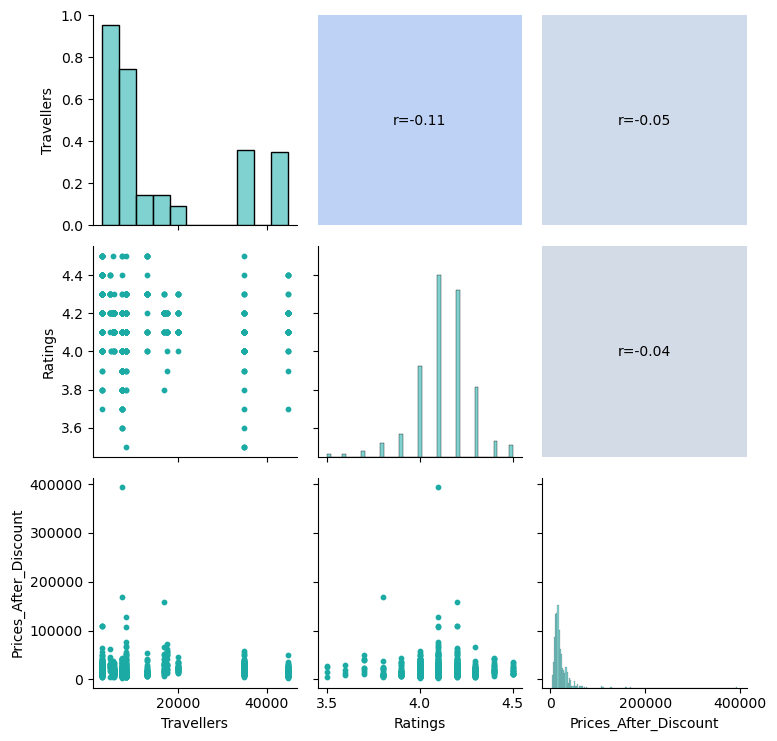

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def corrfunc(x, y, **kwds):
    cmap = plt.get_cmap('coolwarm')  # Use the 'coolwarm' colormap
    norm = plt.Normalize(vmin=-0.5, vmax=0.5)
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"r={r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                color='white' if lightness < 0.7 else 'black', size=10, ha='center', va='center')



# Adjust the number of columns based on your DataFrame
cols = df[['Travellers', 'Ratings', 'Prices_After_Discount']].columns

g = sns.PairGrid(df[cols])
g.map_lower(plt.scatter, s=10, color='#1CABA4')  # Use the first color in the palette for scatter plot
g.map_diag(sns.histplot, kde=False, color='#56C4C1')  # Use the third color in the palette for histograms
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing

plt.show()


In [202]:
df[cols]

Travellers  Ratings  Prices_After_Discount
0          5736      4.2                  16200
1         20148      4.1                  33200
2          7589      4.0                  11549
3         34932      4.1                   9500
4         13108      4.5                  14000
..          ...      ...                    ...
889       16836      4.1                  16000
890       16836      4.1                  14880
891       16836      4.1                  30352
892       16836      3.8                  13000
893        8370      4.0                  16800

[894 rows x 3 columns]

### Insights
* Traveller Patterns:
   * Distribution Diversity: Observe varying concentrations in the 'Travellers' column, indicating different package popularity.
* Ratings Snapshot:
   * Central Ratings Trend: Majority of packages receive ratings around 4.0, suggesting a central tendency in user evaluations.
* Distribution Exploration: 
   * Diagonal histograms offer a visual exploration of the 'Ratings' distribution across packages.
* Pricing Diversity:
   * Price Range Exploration: 'Prices After Discount' exhibit a diverse range, reflecting the broad spectrum of package pricing.
* Correlation Check:
  * Heatmap Insights: The heatmap visually explores linear relationships between 'Travellers,' 'Ratings,' and 'Prices After Discount.'
* Correlation Strength: 
  * Positive correlations suggest potential co-influence; further analysis can unveil underlying dynamics.
  * Negative correlations suggest an inverse relationship between two variables, meaning that as one variable increases, the other tends to decrease.


### Exploring Best Holiday Packages with Key Features

In [203]:
filtered_df=df[(df['Water_Activities'] == 'Water Activities') & (df['Hill_Station'] == 'Hill Stations')&(df['Adventures'] == 'Adventure') & (df['Nature'] == 'Nature') & (df['Religious'] == 'Religious')]

In [204]:
import plotly.express as px

# Custom color palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2']

# Assuming 'Package_Names' and 'Prices_After_Discount' are the columns you want to use for the bar plot
fig = px.bar(filtered_df, x='Package_Names', y='Prices_After_Discount',
             title='Packages with all Features',
             color='Package_Names', color_discrete_sequence=fyn_palette)

# Customize the layout
fig.update_layout(xaxis=dict(tickangle=45, tickmode='array', tickvals=list(filtered_df['Package_Names']),
                             ticktext=list(filtered_df['Package_Names'])),
                  height=700,       # Increase the height of the plot
                  width=1000)       # Increase the width of the plot

# Show the plot
fig.show()


### Insights
* Key Features of Top 5 Vacation Packages
  * Mesmerising Manali Trip:
    * Explore Manali for 3 days and 2 nights at ₹9,500 after discount, featuring adventure, nature, and water activities with a 3-star hotel stay.
  * Exemplary Uttarakhand Family Tour:
    * Enjoy a 7-day family tour in Mussoorie at ₹26,499, offering adventure, nature, and hill stations, including a 5-star hotel stay.
   * Sensational Himachal Tour From Chennai:
      * Embark on a 9-day adventure in Shimla at ₹38,500, experiencing hill stations, water activities, and more, with accommodation in a 4-star hotel.
    * A Pleasant Tour In Munnar:
       * Delight in Munnar for 3 days and 2 nights at ₹10,231, featuring adventure, nature, and hill stations, with a 3-star hotel stay.
   * Ravishing Rishikesh Tour:
      * Experience Rishikesh for 2 days and 1 night at ₹6,825, offering adventure, nature, and water activities, with a 3-star hotel stay.

* These packages provide affordable and diverse experiences, ranging from mountain retreats to riverside adventures, catering to various preferences and budgets.


### Exploring Indian States: An Interactive Travel Data Visualization

In [210]:
# Create a function to apply color based on condition
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #1CABA4' if v else '' for v in is_max]

# Apply the styling function to the DataFrame
styled_df = df_states.style.apply(highlight_max)

# Display the DataFrame with highlighted max values
styled_df

In [209]:
import plotly.graph_objects as go
import pandas as pd

# Your Fyn palette
fyn_palette = ['#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2','#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2', '#90DAE0',
               '#ADE7E3', '#9CBFC7', '#879297', '#4A4F55', '#1A2332', '#2C323C', '#B8CDD2','#1CABA4', '#23BAD1', '#56C4C1', '#84C7C2']

# Data with state details, latitude/longitude, and additional information
data = {
    'State': ['Andhra Pradesh', 'Andaman and Nicobar', 'Arunachal Pradesh', 'Assam', 'Delhi', 'Goa', 'Gujarat',
              'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
              'Maharashtra', 'Meghalaya', 'Nepal', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
              'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
    'Latitude': [15.9129, 11.7401, 28.2180, 26.2006, 28.6139, 15.2993, 22.2587, 29.0588, 31.1048, 33.7782, 15.3173, 10.8505,
                 34.2996, 22.9734, 19.7515, 25.4670, 28.3949, 20.9517, 31.1471, 27.0238, 27.5330, 11.1271, 18.1124, 26.8467,
                 30.0668, 22.9868],
    'Longitude': [79.7400, 92.6586, 94.7278, 92.9376, 77.2090, 74.1240, 71.1924, 76.0856, 77.1734, 76.5762, 75.7139, 76.2711,
                  78.2932, 78.6569, 75.7139, 91.3662, 84.1240, 85.0985, 75.3412, 74.2179, 88.5122, 78.6569, 79.0193, 80.9462,
                  79.0193, 87.8550],
    'Package_Count': [19, 30, 8, 17, 31, 46, 37, 1, 109, 29, 43, 111, 13, 12, 4, 27, 1, 9, 2, 68, 25, 66, 11, 11, 151, 13],
    'Total_Travellers': [80944, 587066, 24000, 140520, 308753, 658949, 201816, 34932, 3497262, 415980, 345883, 4522717,
                         65898, 40589, 22108, 100137, 3000, 31589, 69864, 556290, 283690, 501016, 106611, 64588, 1343004, 103023],
    'Mean_Price_After_Discount': [12538.737305, 23619.533203, 33936.875, 23146.529297, 33508.582031, 15963.826172,
                                  20542.027344, 38500.0, 21092.009766, 34185.863281, 16163.279297, 14937.495117,
                                  27152.691406, 22791.25, 9822.0, 19036.408203, 25699.0, 16459.777344, 16799.5,
                                  15887.808594, 42910.480469, 17666.484375, 16652.363281, 15863.181641, 20597.462891,
                                  39480.078125],
    'Ratings': [4.252632, 4.166667, 4.1, 4.170588, 4.1, 4.33913, 4.37027, 4.0, 4.02477, 4.193103, 4.165116, 4.149549,
                4.307693, 4.083333, 4.125, 4.196296, 4.5, 4.188889, 4.0, 4.113235, 4.128, 4.186363, 4.3, 4.072727, 3.965563,
                4.192307],
    'Star_Hotels': ['5 Star', '4 Star', '3 Star', '4 Star', '5 Star', '5 Star', '4 Star', '3 Star', '4 Star', '5 Star',
                    '5 Star', '5 Star', '5 Star', '4 Star', '5 Star', '4 Star', '3 Star', '3 Star', '3 Star', '5 Star',
                    '4 Star', '5 Star', '5 Star', '5 Star', '5 Star', '4 Star'],
    'Total_Reviews': [6897, 230774, 985, 23681, 89805, 80250, 7178, 10095, 216183, 78546, 28843, 396875, 79746, 15942,
                      8354, 7885, 167, 752, 1226, 36695, 163369, 35798, 605, 21863, 79428, 91722]
}

# Check if all arrays have the same length
assert len(data['State']) == len(data['Latitude']) == len(data['Longitude']) == len(data['Package_Count']) \
       == len(data['Total_Travellers']) == len(data['Mean_Price_After_Discount']) == len(data['Ratings']) \
       == len(data['Star_Hotels']) == len(data['Total_Reviews']), "All arrays must be of the same length"

# Create a DataFrame
df_states = pd.DataFrame(data)
# Create an India map with markers
fig = go.Figure()
# Add India map
fig.add_trace(go.Choropleth(
    locationmode="country names",
    locations=['India'],
    z=[1],  # any arbitrary value to represent India
    colorscale="Viridis",
    showscale=False,
))
# Add markers for each state with information on click
for i, row in df_states.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode="country names",
        lon=[row['Longitude']],
        lat=[row['Latitude']],
        hoverinfo="text",
        text=f"{row['State']}<br>Package Count: {row['Package_Count']}<br>Total Travellers: {row['Total_Travellers']}<br>"
             f"Mean Price After Discount: {row['Mean_Price_After_Discount']}<br>Ratings: {row['Ratings']}<br>"
             f"Star Hotels: {row['Star_Hotels']}<br>Total Reviews: {row['Total_Reviews']}",
        mode='markers',
        marker=dict(
            size=10,
            color=fyn_palette[i],  # Use Fyn palette color
            opacity=0.8,
            symbol='circle',
            line=dict(width=1, color='rgba(0, 0, 0, 0.5)'),
        ),
    ))
# Update layout for better map visualization
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="black",
    showland=True,
    landcolor="rgb(243, 243, 243)",
)
# Show the plot
fig.show()


### Insights from Indian States Travel Data:
* Package Count:
  * The highest package count is observed in Uttarakhand (151), suggesting a diverse range of travel options.
  * Haryana and Nepal have the lowest package counts, each with only 1.
* Total Travellers:
  * Himachal Pradesh stands out with a significantly high number of total travelers (over 3.4 million).
  * Sikkim, Odisha, and Nepal have relatively fewer travelers, each below 100,000.
* Mean Price After Discount:
   * Goa and Rajasthan have the highest mean prices after discount, indicating these destinations might offer premium experiences.
   * In contrast, Odisha and Uttar Pradesh have lower mean prices, making them potentially more budget-friendly.
* Ratings:
   * Most states have high average ratings, with Nepal receiving the highest rating of 4.5.
   * Haryana has the lowest rating of 4.0, indicating potential areas for improvement.
* Star Hotels:
   * There is a prevalence of 5-star hotels in popular travel destinations like Goa, Rajasthan, and Himachal Pradesh.
   * Haryana and Odisha seem to have a higher proportion of 3-star hotels.
* Total Reviews:
   * Kerala and Maharashtra have a substantial number of total reviews, indicating a high level of traveler engagement.
   * States like Odisha and Nepal have comparatively lower total review counts.
